In [136]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import random
import joblib

import scipy.stats as stats
from scipy.stats import chi2_contingency

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, fbeta_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

from collections import Counter
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
import statsmodels.api as sm

from sklearn.tree import plot_tree


In [137]:
# Load dataset
df1 = pd.read_csv('RSU50-20249401-DataSet.csv')

# Display the first few rows of the dataset
df1.head()

,POLICYNO,PRODUCT_TYPE,POLICYTERM_YEARS,COMMENCEDATE,COMMENCED_YEAR,PAYMENT_FREQUENCY,ANNUAL_PREMIUM,PAYMENT_METHOD,LASTPAYMENTDATE,NEXTPAYMENTDATE,...,BASIC_SUMINSURED,ACCIDENT_SUMINSURED,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,AGE,GENDER,MARITAL_STATUS,PROVINCECODE,TOTAL_PAYMENT,POLICY_STATUS
0,NJEV2018-453,ENDOW,49,2/25/2018,2018,M,24732,CASH,4/25/2018,5/25/2018 0:00,...,500000,0,0,0,32,M,M,NRWTN,6183,LAPSE
1,NJEV2018-2541,ENDOW,49,10/19/2018,2018,M,24732,CASH,10/19/2018,11/19/2018 0:00,...,500000,0,0,0,32,M,M,NRCTL,2061,LAPSE
2,NJEV2018-1209,ENDOW,49,5/25/2018,2018,M,24732,CASH,5/25/2018,6/25/2018 0:00,...,500000,0,0,0,32,M,M,UVA,2061,LAPSE
3,NJEV2018-1378,ENDOW,49,6/11/2018,2018,M,24732,CASH,2/11/2020,3/11/2020 0:00,...,500000,0,0,0,32,F,M,NRWTN,43281,LAPSE
4,NJEV2018-1853,ENDOW,49,8/8/2018,2018,M,24732,CASH,8/8/2018,9/8/2018 0:00,...,500000,0,0,0,32,M,M,NRWTN,2061,LAPSE


In [138]:
#Shape of the dataframe

print("The shape of the dataframe is: {}".format(df1.shape))

The shape of the dataframe is: (61053, 24)


In [139]:
#Columns of the dataframe

df1.columns

Index(['POLICYNO', 'PRODUCT_TYPE', 'POLICYTERM_YEARS', 'COMMENCEDATE',
       'COMMENCED_YEAR', 'PAYMENT_FREQUENCY', 'ANNUAL_PREMIUM',
       'PAYMENT_METHOD', 'LASTPAYMENTDATE', 'NEXTPAYMENTDATE',
       'NEXTPAYMENT_YEAR', 'TENURE_MONTHS', 'NO_OF_COVERS', 'TOTAL_SUMINSURED',
       'BASIC_SUMINSURED', 'ACCIDENT_SUMINSURED', 'HOSPITALIZATION_SUMINSURED',
       'OTHER COVERS_SUMINSURED', 'AGE', 'GENDER', 'MARITAL_STATUS',
       'PROVINCECODE', 'TOTAL_PAYMENT', 'POLICY_STATUS'],
      dtype='object')

In [140]:
# Basic dataset information

print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61053 entries, 0 to 61052
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   POLICYNO                    61053 non-null  object
 1   PRODUCT_TYPE                61053 non-null  object
 2   POLICYTERM_YEARS            61053 non-null  int64 
 3   COMMENCEDATE                61053 non-null  object
 4   COMMENCED_YEAR              61053 non-null  int64 
 5   PAYMENT_FREQUENCY           61053 non-null  object
 6   ANNUAL_PREMIUM              61053 non-null  int64 
 7   PAYMENT_METHOD              61053 non-null  object
 8   LASTPAYMENTDATE             61053 non-null  object
 9   NEXTPAYMENTDATE             61053 non-null  object
 10  NEXTPAYMENT_YEAR            61053 non-null  int64 
 11  TENURE_MONTHS               61053 non-null  int64 
 12  NO_OF_COVERS                61053 non-null  int64 
 13  TOTAL_SUMINSURED            61053 non-null  in

<Axes: >

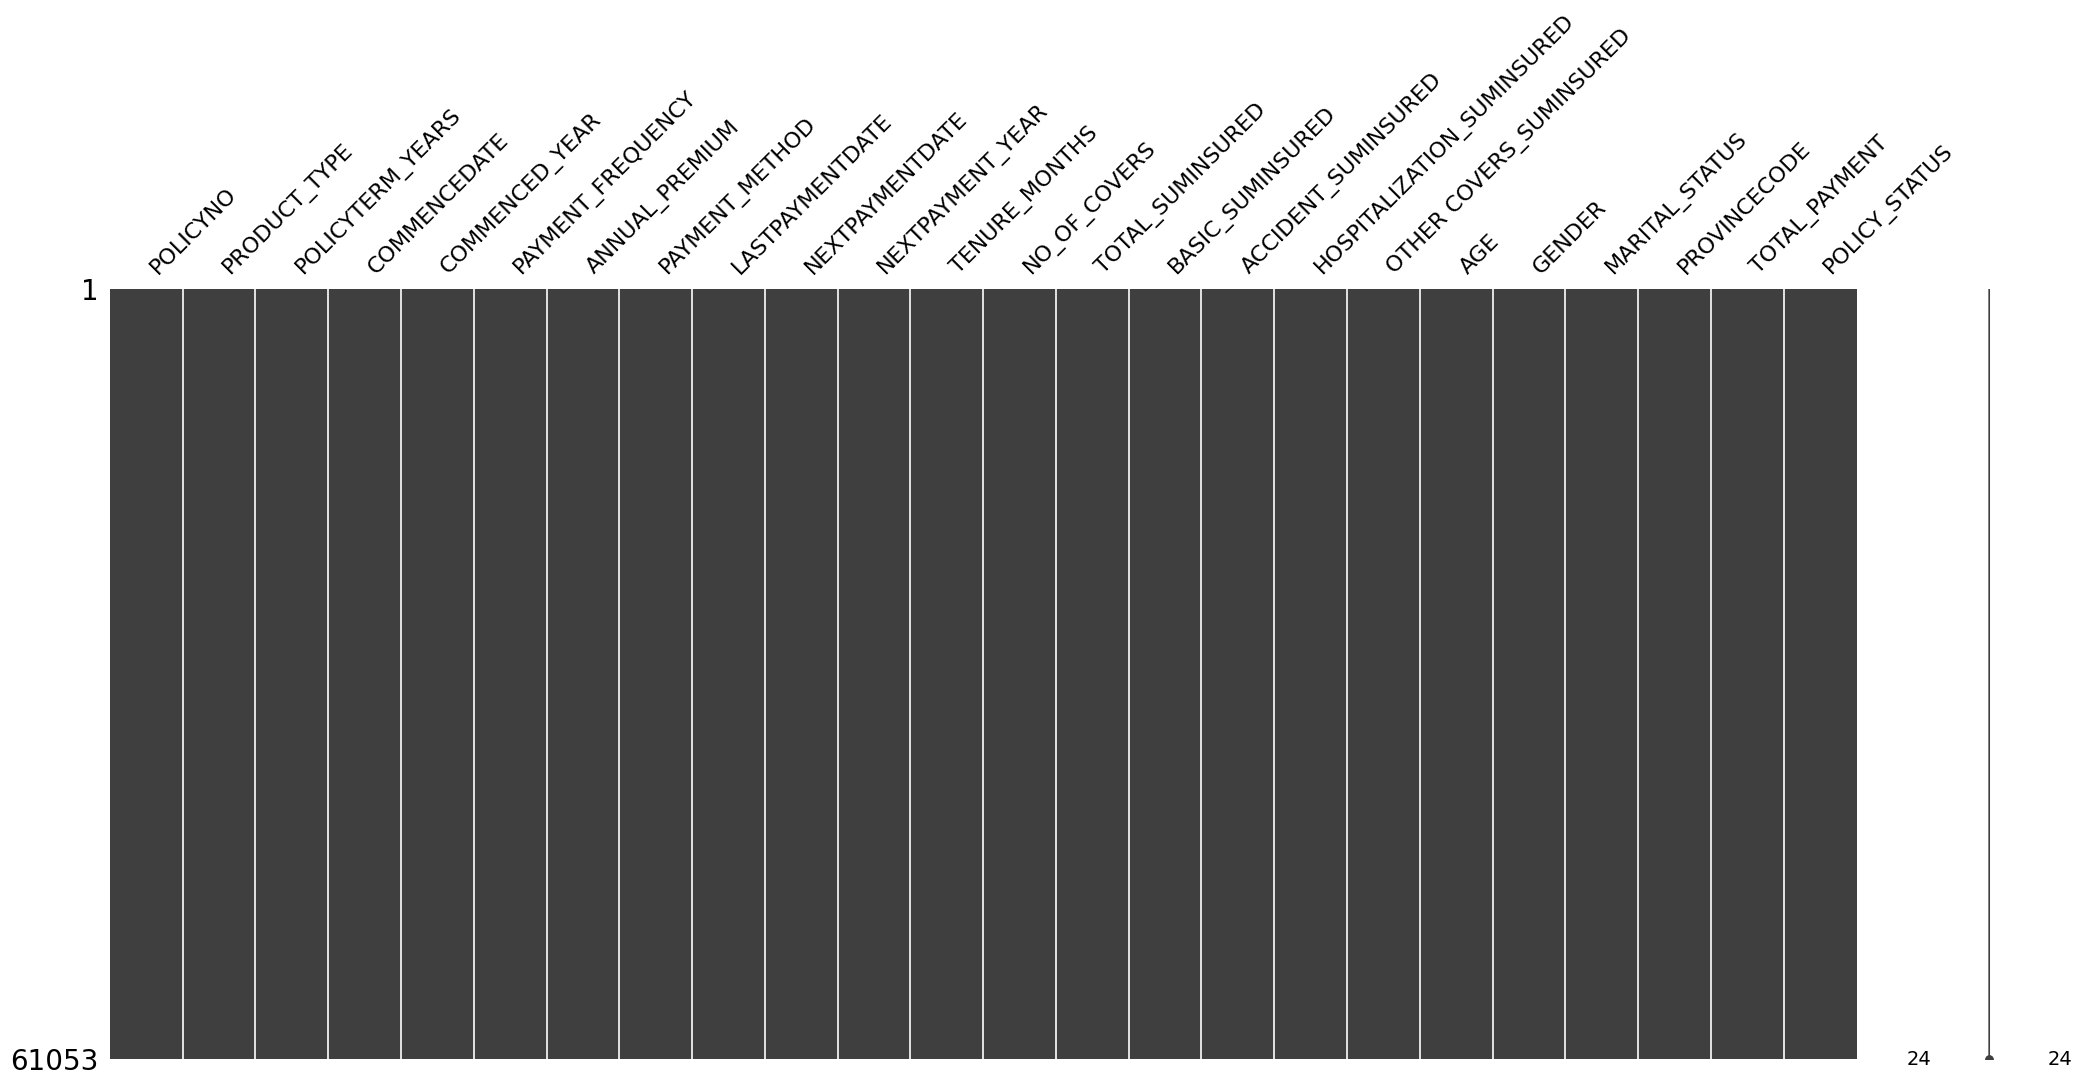

In [141]:
#Visualize Missing Values

msno.matrix(df1)


In [7]:
#Check whether there's any null values

df1.isnull().any().any()

False

In [8]:
#No of missing values in each column

df1.isnull().sum()

POLICYNO                      0
PRODUCT_TYPE                  0
POLICYTERM_YEARS              0
COMMENCEDATE                  0
COMMENCED_YEAR                0
PAYMENT_FREQUENCY             0
ANNUAL_PREMIUM                0
PAYMENT_METHOD                0
LASTPAYMENTDATE               0
NEXTPAYMENTDATE               0
NEXTPAYMENT_YEAR              0
TENURE_MONTHS                 0
NO_OF_COVERS                  0
TOTAL_SUMINSURED              0
BASIC_SUMINSURED              0
ACCIDENT_SUMINSURED           0
HOSPITALIZATION_SUMINSURED    0
OTHER COVERS_SUMINSURED       0
AGE                           0
GENDER                        0
MARITAL_STATUS                0
PROVINCECODE                  0
TOTAL_PAYMENT                 0
POLICY_STATUS                 0
dtype: int64

In [9]:
#Checking Duplicates

print('Known observations: {}\nUnique observations: {}'.format(len(df1.index),len(df1.drop_duplicates().index)))

print("**No duplicates Found!**")

Known observations: 61053
Unique observations: 61053
**No duplicates Found!**


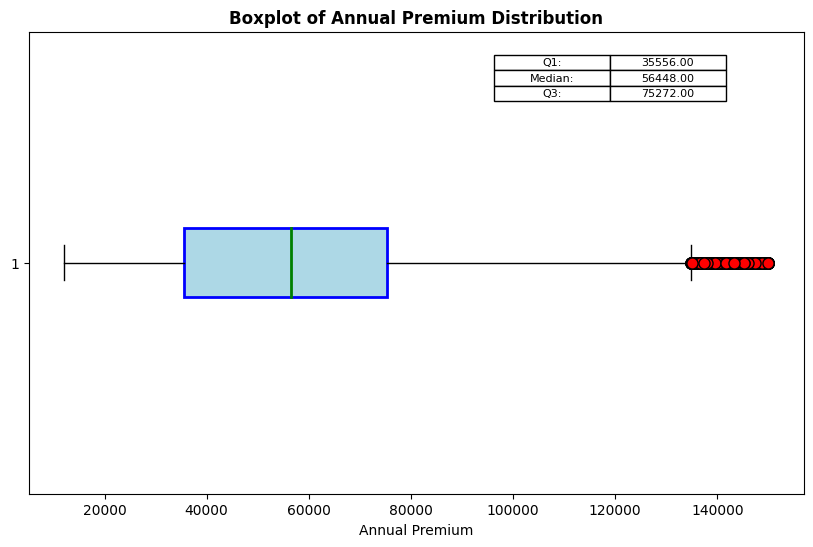

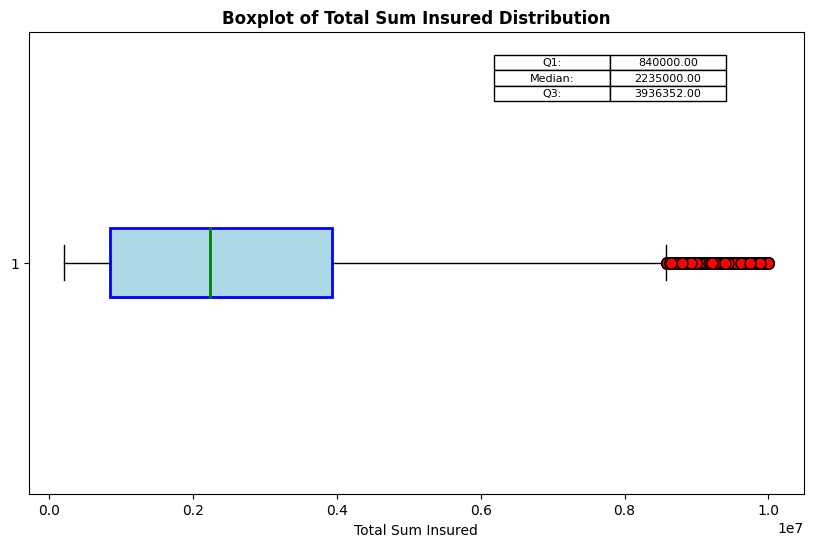

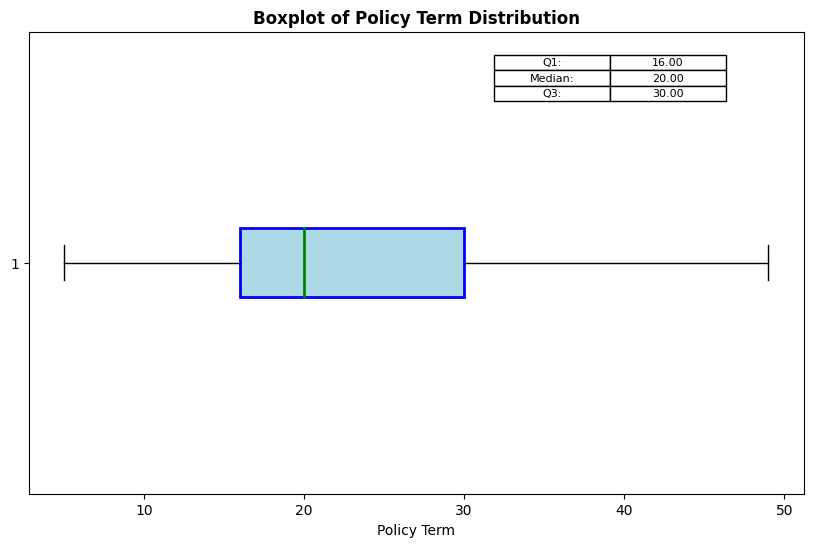

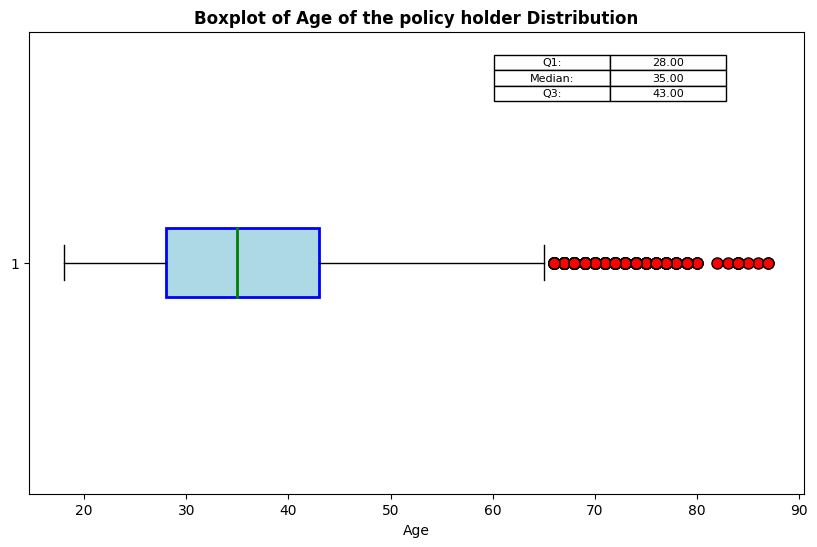

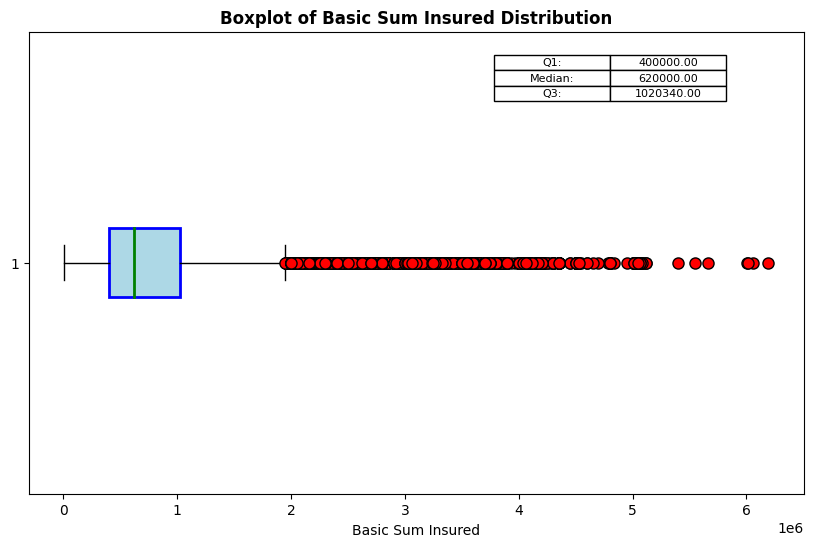

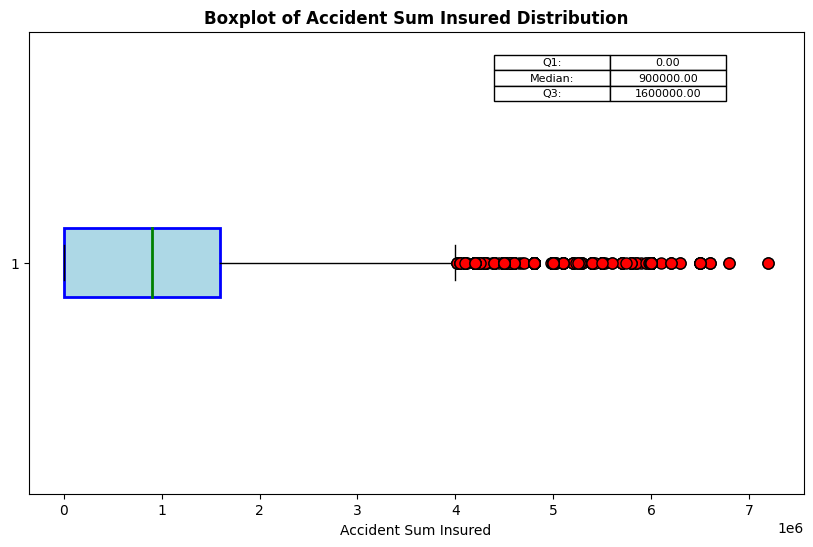

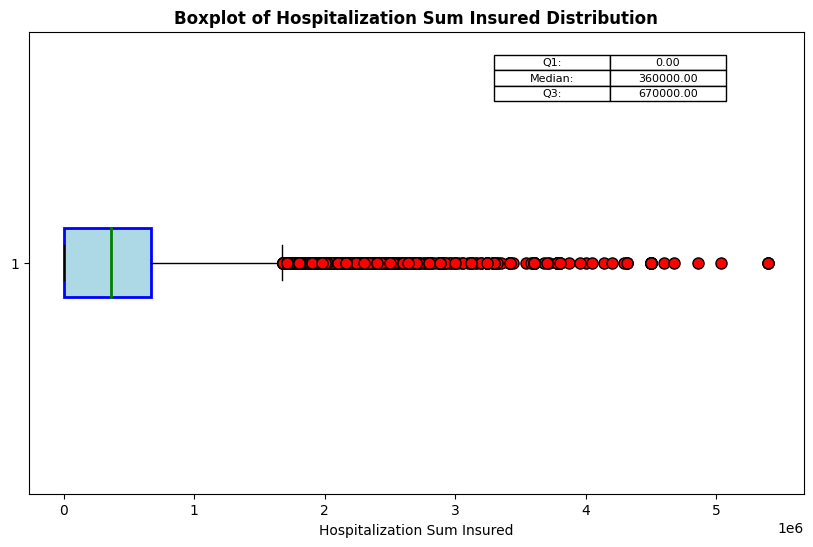

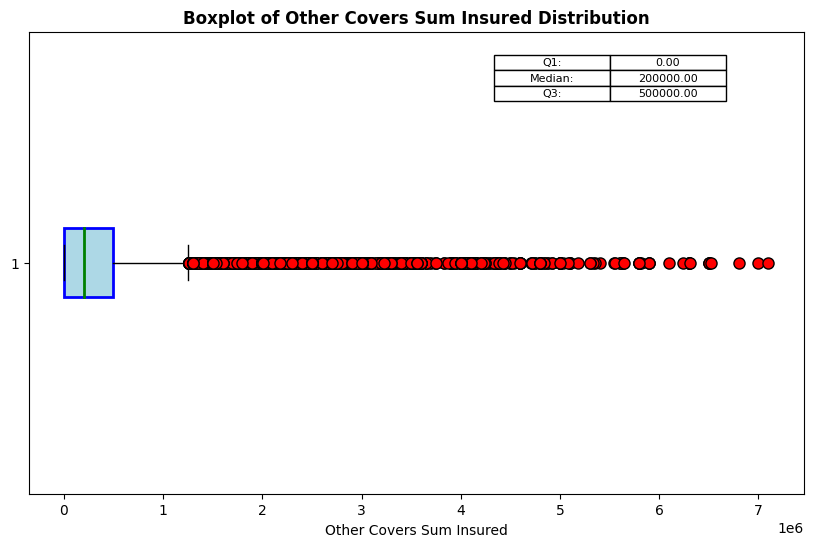

In [10]:
# Box Plots to check the distribution of data

def create_custom_boxplot(data, title, x_label):
    # Set custom styles for boxplot elements
    boxprops = dict(linestyle='-', linewidth=2, color='blue', facecolor='lightblue')  # Light blue fill color
    flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
    medianprops = dict(linestyle='-', linewidth=2, color='green')

    # Create the boxplot
    fig, ax = plt.subplots(figsize=(10, 6))
    boxplot = ax.boxplot(data, vert=False, patch_artist=True, showfliers=True,
                         boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)

    # Add title and axis labels
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel(x_label)

    # Calculate quartile values
    quartiles = np.percentile(data, [25, 50, 75])
    q1, median, q3 = quartiles[0], quartiles[1], quartiles[2]

    # Create a table to display quartile values
    table_data = [['Q1:', f'{q1:.2f}'],
                  ['Median:', f'{median:.2f}'],
                  ['Q3:', f'{q3:.2f}']]

    # Adjust the bbox parameter to move the table to the top right corner
    table = ax.table(cellText=table_data, colWidths=[0.6, 0.6], cellLoc='center', loc='upper right', bbox=[0.6, 0.85, 0.3, 0.1])
    table.auto_set_font_size(False)
    table.set_fontsize(8)

    plt.show()

create_custom_boxplot(df1['ANNUAL_PREMIUM'], 'Boxplot of Annual Premium Distribution', 'Annual Premium')
create_custom_boxplot(df1['TOTAL_SUMINSURED'], 'Boxplot of Total Sum Insured Distribution', 'Total Sum Insured')
create_custom_boxplot(df1['POLICYTERM_YEARS'], 'Boxplot of Policy Term Distribution', 'Policy Term')
create_custom_boxplot(df1['AGE'], 'Boxplot of Age of the policy holder Distribution', 'Age')
create_custom_boxplot(df1['BASIC_SUMINSURED'], 'Boxplot of Basic Sum Insured Distribution', 'Basic Sum Insured')
create_custom_boxplot(df1['ACCIDENT_SUMINSURED'], 'Boxplot of Accident Sum Insured Distribution', 'Accident Sum Insured')
create_custom_boxplot(df1['HOSPITALIZATION_SUMINSURED'], 'Boxplot of Hospitalization Sum Insured Distribution', 'Hospitalization Sum Insured')
create_custom_boxplot(df1['OTHER COVERS_SUMINSURED'], 'Boxplot of Other Covers Sum Insured Distribution', 'Other Covers Sum Insured')

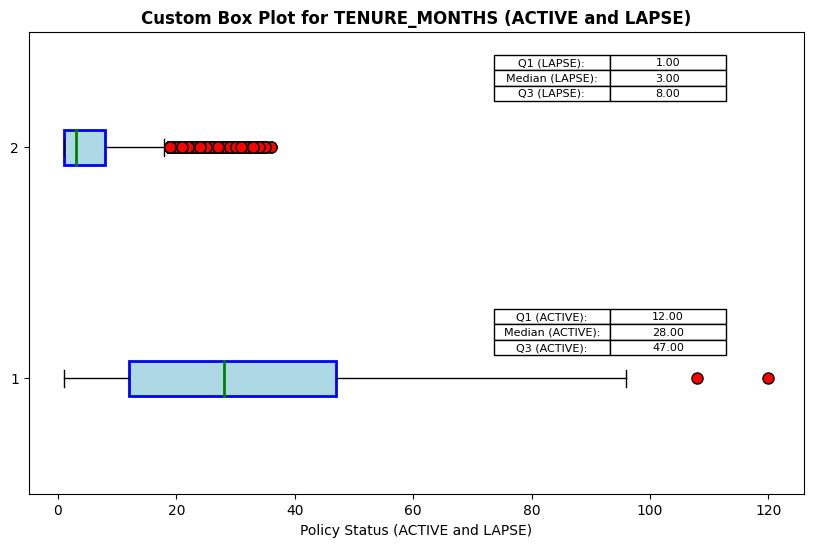

In [11]:
# Policy Status wise distribution of policies for TENURE_MONTHS, TOTAL_PAYMENT, NO_OF_SETTLED_CLAIMS, PAIDCLAIM_AMOUNT, LAST_CLAIM_PROCESSTIME_DAYS

active_data = df1[df1['POLICY_STATUS'] == 'ACTIVE']
lapse_data = df1[df1['POLICY_STATUS'] == 'LAPSE']

# Create a function to create custom box plots
def create_custom_boxplots(data1, data2, title, x_label):
    # Set custom styles for boxplot elements
    boxprops = dict(linestyle='-', linewidth=2, color='blue', facecolor='lightblue')  # Light blue fill color
    flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
    medianprops = dict(linestyle='-', linewidth=2, color='green')

    # Create the boxplot
    fig, ax = plt.subplots(figsize=(10, 6))
    positions = [1, 2]  # Define positions for the two boxplots
    boxplot1 = ax.boxplot([data1], positions=[positions[0]], vert=False, patch_artist=True, showfliers=True,
                         boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)
    
    boxplot2 = ax.boxplot([data2], positions=[positions[1]], vert=False, patch_artist=True, showfliers=True,
                         boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)

    # Add title and axis labels
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel(x_label)

    # Calculate quartile values for data1
    quartiles1 = np.percentile(data1, [25, 50, 75])
    q1_1, median_1, q3_1 = quartiles1[0], quartiles1[1], quartiles1[2]

    # Calculate quartile values for data2
    quartiles2 = np.percentile(data2, [25, 50, 75])
    q1_2, median_2, q3_2 = quartiles2[0], quartiles2[1], quartiles2[2]

    # Create tables to display quartile values for data1
    table_data1 = [
        [f'Q1 (ACTIVE):', f'{q1_1:.2f}'],
        [f'Median (ACTIVE):', f'{median_1:.2f}'],
        [f'Q3 (ACTIVE):', f'{q3_1:.2f}'],
    ]

    # Create tables to display quartile values for data2
    table_data2 = [
        [f'Q1 (LAPSE):', f'{q1_2:.2f}'],
        [f'Median (LAPSE):', f'{median_2:.2f}'],
        [f'Q3 (LAPSE):', f'{q3_2:.2f}'],
    ]

    # Adjust the bbox parameter to move the tables to separate positions
    table1 = ax.table(cellText=table_data1, colWidths=[0.6, 0.6], cellLoc='center', loc='upper right', bbox=[0.6, 0.3, 0.3, 0.1])
    table1.auto_set_font_size(False)
    table1.set_fontsize(8)

    table2 = ax.table(cellText=table_data2, colWidths=[0.6, 0.6], cellLoc='center', loc='lower right', bbox=[0.6, 0.85, 0.3, 0.1])
    table2.auto_set_font_size(False)
    table2.set_fontsize(8)

    plt.show()



# Call the function to create the box plots
create_custom_boxplots(active_data['TENURE_MONTHS'], lapse_data['TENURE_MONTHS'], "Custom Box Plot for TENURE_MONTHS (ACTIVE and LAPSE)", "Policy Status (ACTIVE and LAPSE)")


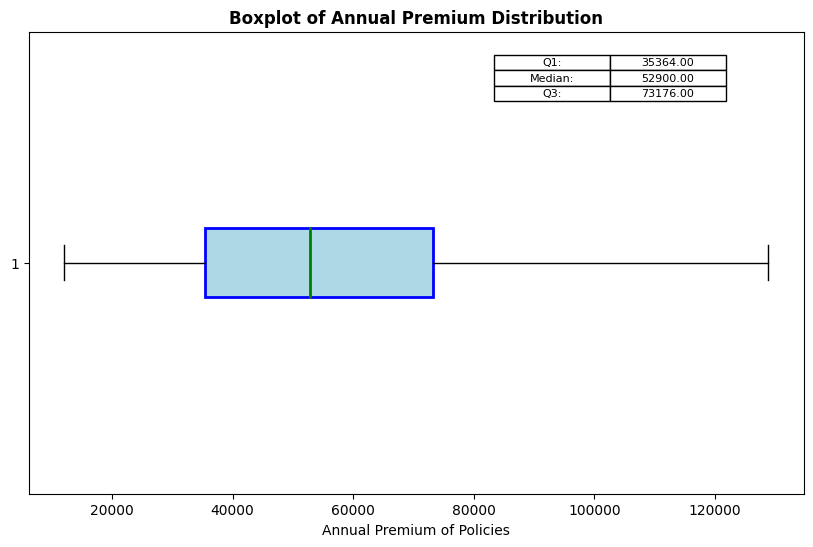

In [12]:
# Remove Outliers from Annual Premium of policies

column_name = 'ANNUAL_PREMIUM'
z_scores = stats.zscore(df1[column_name])  # Calculate the z-scores for the column
threshold = 2.3 # Define a threshold for identifying outliers
outlier_mask = (abs(z_scores) < threshold)
df1 = df1[outlier_mask]

create_custom_boxplot(df1['ANNUAL_PREMIUM'], 'Boxplot of Annual Premium Distribution', 'Annual Premium of Policies')

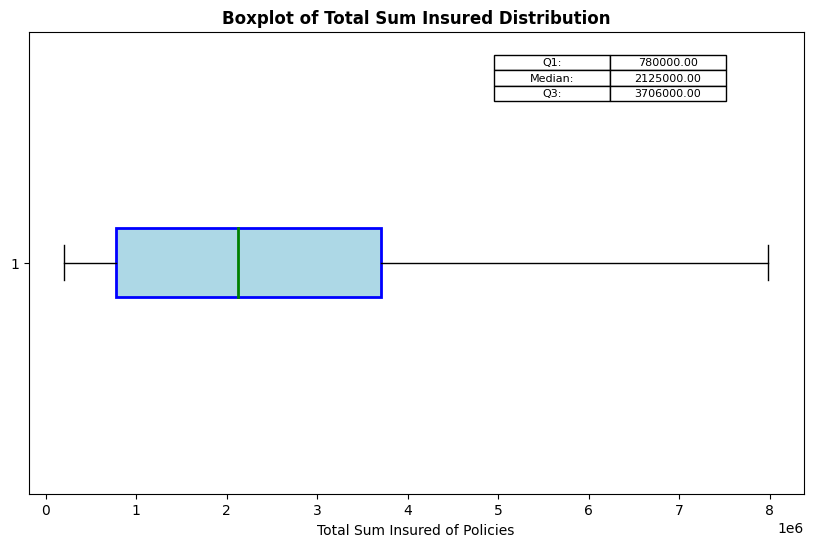

In [13]:
# Remove Outliers from Total Sum Insured of policies

column_name = 'TOTAL_SUMINSURED'
z_scores = stats.zscore(df1[column_name])  # Calculate the z-scores for the column
threshold = 2.6 # Define a threshold for identifying outliers
outlier_mask = (abs(z_scores) < threshold)
df1 = df1[outlier_mask]

create_custom_boxplot(df1['TOTAL_SUMINSURED'], 'Boxplot of Total Sum Insured Distribution', 'Total Sum Insured of Policies')

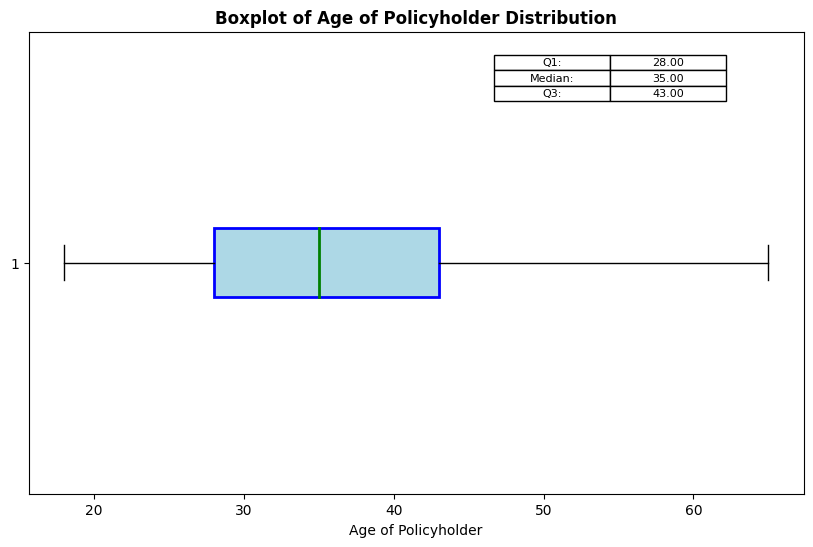

In [14]:
# Remove Outliers from Age of the Policy Holder

column_name = 'AGE'
z_scores = stats.zscore(df1[column_name])  # Calculate the z-scores for the column
threshold = 2.8 # Define a threshold for identifying outliers
outlier_mask = (abs(z_scores) < threshold)
df1 = df1[outlier_mask]

create_custom_boxplot(df1['AGE'], 'Boxplot of Age of Policyholder Distribution', 'Age of Policyholder')

In [15]:
# Drop the columns

df1 = df1.drop(["COMMENCEDATE","LASTPAYMENTDATE","NEXTPAYMENTDATE","PROVINCECODE","TOTAL_PAYMENT"], axis = 1)
df1.head()

,POLICYNO,PRODUCT_TYPE,POLICYTERM_YEARS,COMMENCED_YEAR,PAYMENT_FREQUENCY,ANNUAL_PREMIUM,PAYMENT_METHOD,NEXTPAYMENT_YEAR,TENURE_MONTHS,NO_OF_COVERS,TOTAL_SUMINSURED,BASIC_SUMINSURED,ACCIDENT_SUMINSURED,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,AGE,GENDER,MARITAL_STATUS,POLICY_STATUS
0,NJEV2018-453,ENDOW,49,2018,M,24732,CASH,2018,3,1,500000,500000,0,0,0,32,M,M,LAPSE
1,NJEV2018-2541,ENDOW,49,2018,M,24732,CASH,2018,1,1,500000,500000,0,0,0,32,M,M,LAPSE
2,NJEV2018-1209,ENDOW,49,2018,M,24732,CASH,2018,1,1,500000,500000,0,0,0,32,M,M,LAPSE
3,NJEV2018-1378,ENDOW,49,2018,M,24732,CASH,2020,21,1,500000,500000,0,0,0,32,F,M,LAPSE
4,NJEV2018-1853,ENDOW,49,2018,M,24732,CASH,2018,1,1,500000,500000,0,0,0,32,M,M,LAPSE


In [16]:
#Shape of the dataframe after removing outliers

print("The shape of the dataframe after removing outliers is: {}".format(df1.shape))

The shape of the dataframe after removing outliers is: (57792, 19)


In [17]:

# Group the data by POLICY_STATUS and count occurrences

policy_status_counts = df1['POLICY_STATUS'].value_counts()
percentage = (policy_status_counts / policy_status_counts.sum()) * 100
policy_status_summary = pd.DataFrame({'Count': policy_status_counts, 'Percentage': percentage})

policy_status_summary.rename(columns={'index': 'POLICY_STATUS'}, inplace=True)
policy_status_summary.sort_values(by='Count', ascending=True, inplace=True)

print(policy_status_summary)


               Count  Percentage
POLICY_STATUS                   
ACTIVE         11549   19.983735
LAPSE          46243   80.016265


In [18]:
#Find unique values in categorical variables

catagorical = [i for i in df1.columns if df1[i].dtypes == 'object']

for i in catagorical:   
    print(i, ':', df1[i].unique())

POLICYNO : ['NJEV2018-453' 'NJEV2018-2541' 'NJEV2018-1209' ... 'NGT022018-97'
 'JCA012018-552' 'JCA012018-25']
PRODUCT_TYPE : ['ENDOW' 'UL']
PAYMENT_FREQUENCY : ['M' 'A' 'Q' 'H']
PAYMENT_METHOD : ['CASH' 'STANDING ORDER' 'DIGITAL PAYMENT']
GENDER : ['M' 'F']
MARITAL_STATUS : ['M' 'S']
POLICY_STATUS : ['LAPSE' 'ACTIVE']


In [19]:
#Count unique values in categorical variables

df1.describe(include=['object']).T

,count,unique,top,freq
POLICYNO,57792,57792,NJEV2018-453,1
PRODUCT_TYPE,57792,2,ENDOW,38749
PAYMENT_FREQUENCY,57792,4,M,45349
PAYMENT_METHOD,57792,3,CASH,48232
GENDER,57792,2,M,33479
MARITAL_STATUS,57792,2,M,42814
POLICY_STATUS,57792,2,LAPSE,46243


In [20]:
# Shows statistical summaries for all numeric columns

df1.describe()

,POLICYTERM_YEARS,COMMENCED_YEAR,ANNUAL_PREMIUM,NEXTPAYMENT_YEAR,TENURE_MONTHS,NO_OF_COVERS,TOTAL_SUMINSURED,BASIC_SUMINSURED,ACCIDENT_SUMINSURED,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,AGE
count,57792.000000,57792.000000,57792.000000,57792.000000,57792.000000,57792.000000,5.779200e+04,5.779200e+04,5.779200e+04,5.779200e+04,5.779200e+04,57792.000000
mean,24.423830,2020.229738,57055.064542,2021.058070,10.582261,3.001782,2.494792e+06,7.843909e+05,9.756664e+05,4.099654e+05,3.247693e+05,35.974841
std,12.208092,1.423025,26483.025065,1.637067,14.200604,1.312439,1.862267e+06,5.580847e+05,1.028994e+06,4.217010e+05,4.344359e+05,10.276551
min,5.000000,2018.000000,12024.000000,2018.000000,1.000000,1.000000,2.000000e+05,4.068000e+03,0.000000e+00,0.000000e+00,0.000000e+00,18.000000
25%,16.000000,2019.000000,35244.000000,2020.000000,1.000000,1.000000,7.980000e+05,4.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,28.000000
50%,20.000000,2021.000000,50892.000000,2021.000000,4.000000,4.000000,2.140000e+06,6.000000e+05,8.000000e+05,3.600000e+05,2.000000e+05,35.000000
75%,35.000000,2021.000000,72480.000000,2022.000000,12.000000,4.000000,3.720000e+06,1.008176e+06,1.500000e+06,6.250000e+05,5.000000e+05,43.000000
max,49.000000,2022.000000,128853.000000,2029.000000,120.000000,6.000000,7.985570e+06,6.016352e+06,6.500000e+06,5.400000e+06,5.640000e+06,65.000000


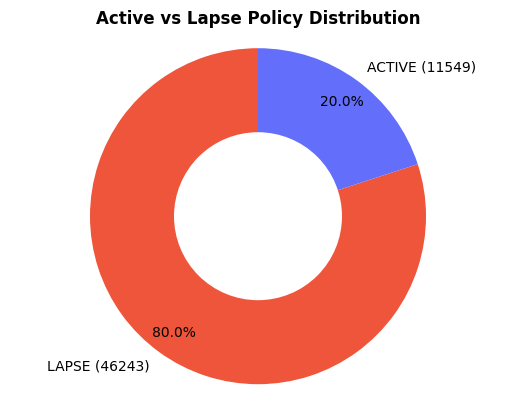

In [21]:
# Active and Lapse Policy Distribution

policy_status_counts = df1['POLICY_STATUS'].value_counts()
type_ = policy_status_counts.index
values = policy_status_counts.values
custom_colors = ['#EF553B', '#636EFA']

# Create labels with counts
labels = [f"{t} ({v})" for t, v in zip(type_, values)]

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', colors=custom_colors, startangle=90, pctdistance=0.85)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Draw a white circle at the center to make it a donut chart
center_circle = plt.Circle((0, 0), 0.50, fc='white')
fig.gca().add_artist(center_circle)

# Add a title
plt.title(f"Active vs Lapse Policy Distribution", fontweight='bold')

# Show the chart
plt.show()

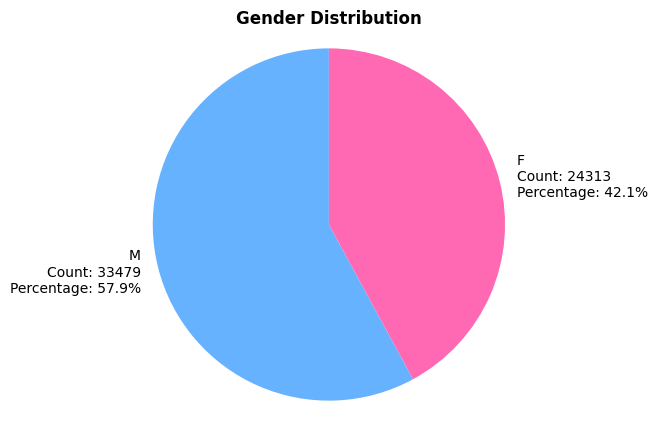

In [22]:
#Pie chart which represents Gender distribution of policy holders

# Calculate gender counts
gender_counts = df1['GENDER'].value_counts()

# Calculate percentages
total_count = len(df1)
gender_percentages = (gender_counts / total_count) * 100

# Define custom colors
custom_colors = ['#66B2FF', 'hotpink']  # Custom colors for Male and Female

# Create pie chart labels with gender, count, and percentage
labels = gender_counts.index
labels_with_info = [f"{gender}\nCount: {count}\nPercentage: {percentage:.1f}%" for gender, count, percentage in zip(labels, gender_counts, gender_percentages)]

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=labels_with_info, autopct='', colors=custom_colors, startangle=90)
plt.title("Gender Distribution",fontweight='bold')

# Display the chart
plt.axis('equal')
plt.show()

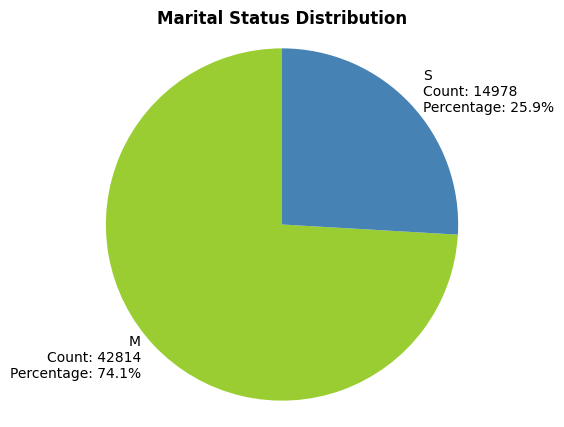

In [23]:
#Pie chart which represents distribution of Marital Status of policy holders

# Calculate marital status counts
marital_status_counts = df1['MARITAL_STATUS'].value_counts()

# Calculate percentages
total_count = len(df1)
marital_status_percentages = (marital_status_counts / total_count) * 100

# Define custom colors
custom_colors = ['yellowgreen', 'steelblue']  # Custom colors for Married and Single

# Create pie chart labels with marital status, count, and percentage
labels = marital_status_counts.index
labels_with_info = [f"{marital_status}\nCount: {count}\nPercentage: {percentage:.1f}%" for marital_status, count, percentage in zip(labels, marital_status_counts, marital_status_percentages)]

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(marital_status_counts, labels=labels_with_info, autopct='', colors=custom_colors, startangle=90)
plt.title("Marital Status Distribution", fontweight='bold')

# Display the chart
plt.axis('equal')
plt.show()

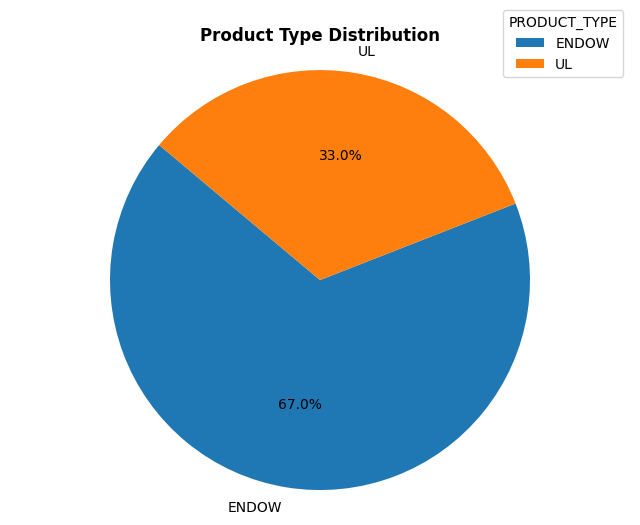

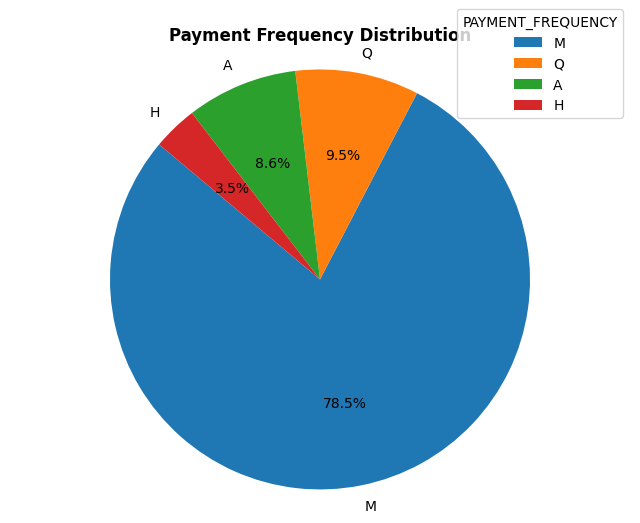

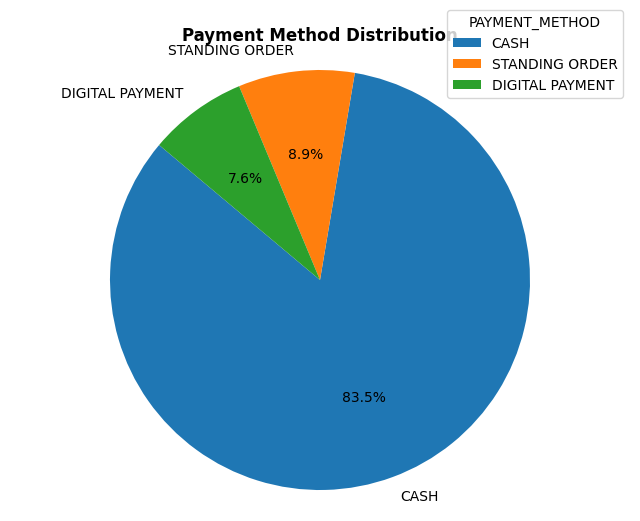

In [24]:
#Pie Charts for Product Type, Payment Frequecy, Payment Method

def create_pie_chart(data, column_name, title):
    # Group the data by the specified column and count the number of occurrences for each category
    column_counts = data[column_name].value_counts()

    # Create a pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(title, fontweight='bold')
    plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.

    # Add a legend
    plt.legend(column_counts.index, title=column_name, loc='upper right', bbox_to_anchor=(1, 1.1))

    plt.show()


create_pie_chart(df1, 'PRODUCT_TYPE', 'Product Type Distribution')
create_pie_chart(df1, 'PAYMENT_FREQUENCY', 'Payment Frequency Distribution')
create_pie_chart(df1, 'PAYMENT_METHOD', 'Payment Method Distribution')


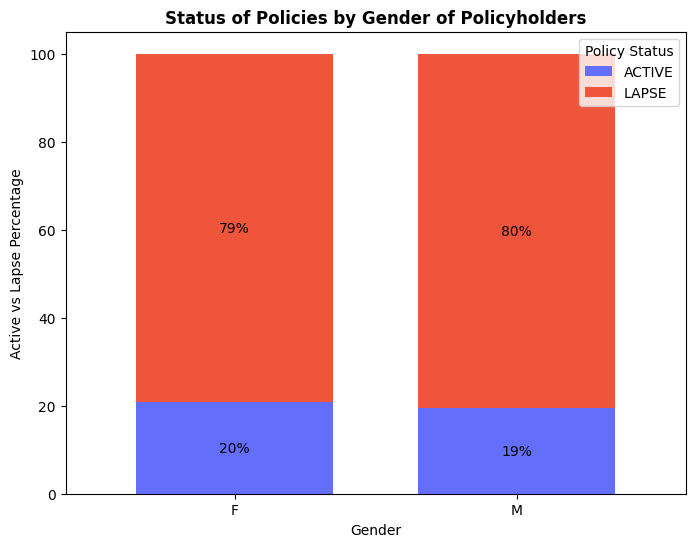

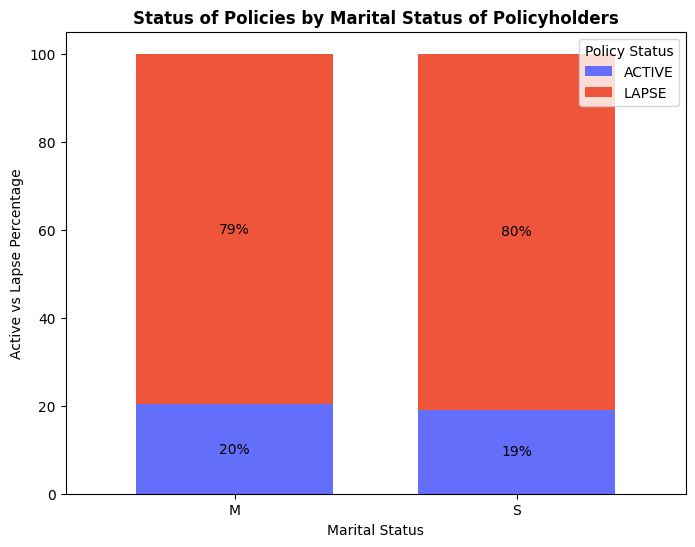

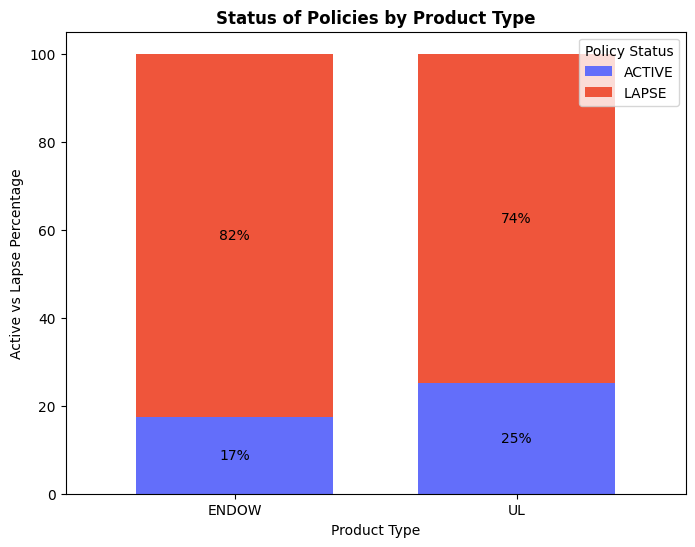

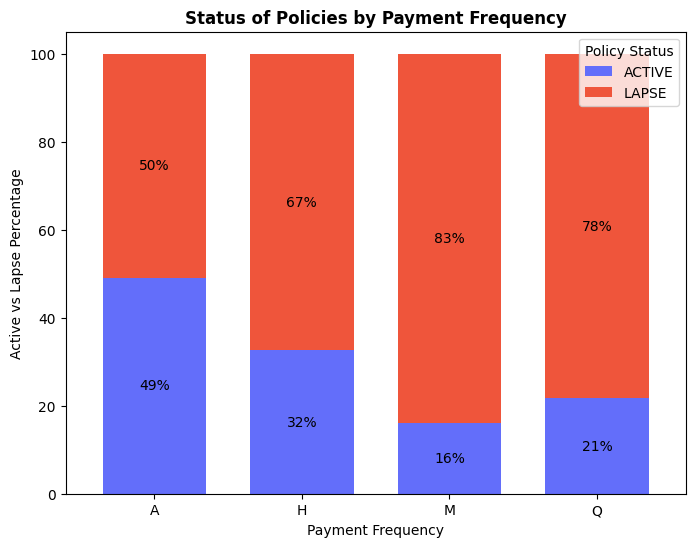

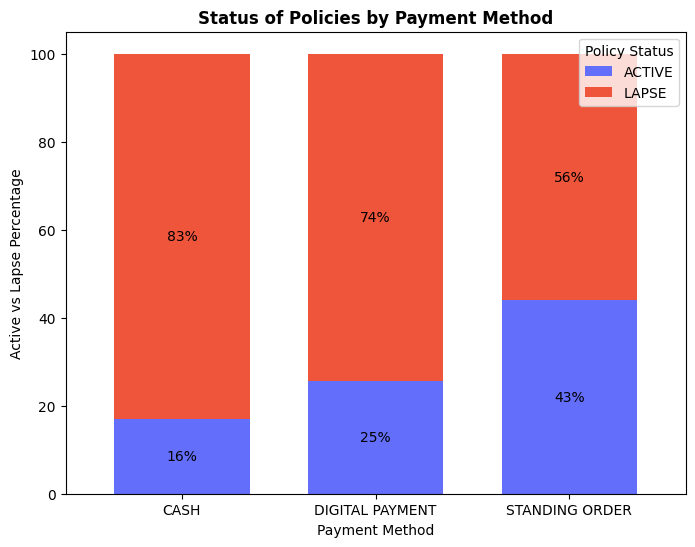

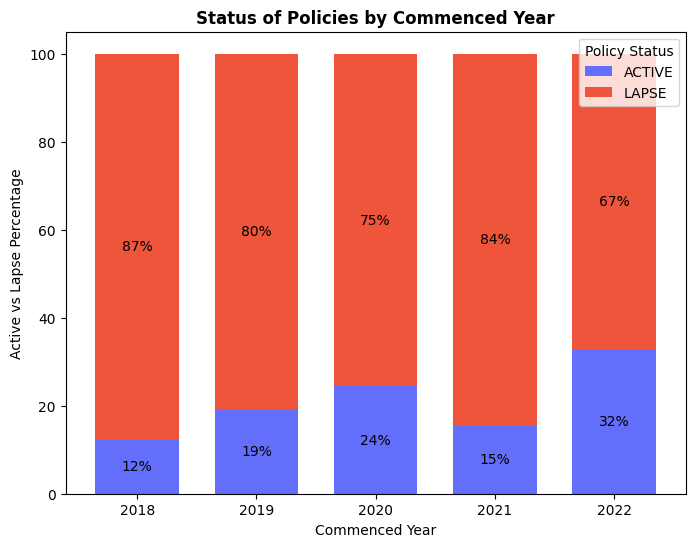

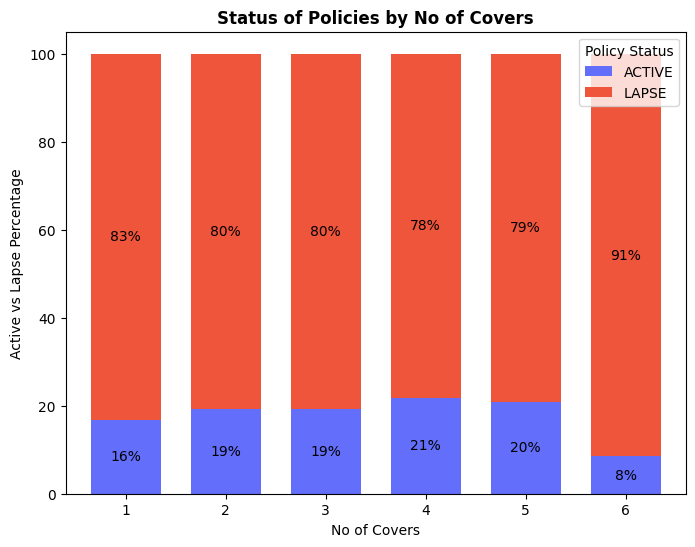

In [25]:
# Stacked bar charts to present the Active vs Lapse policy distribution of different categorical variables

def create_stacked_bar_chart(data, x_column, y_column, title, xlabel, ylabel, legend_title):
    # Group the data by the specified columns and count the number of occurrences in each group
    grouped = data.groupby([x_column, y_column]).size().unstack(fill_value=0)

    # Calculate the total count of items for each group
    total_counts = grouped.sum(axis=1)

    # Calculate the percentages
    percentage_grouped = grouped.div(total_counts, axis=0) * 100

    # Define custom colors for each category within the y_column
    custom_colors = {
        'ACTIVE': '#636EFA',
        'LAPSE': '#EF553B'
    }

    # Create the stacked bar chart with custom colors
    ax = percentage_grouped.plot(kind='bar', stacked=True, figsize=(8, 6), color=[custom_colors.get(col, '#A9A9A9') for col in percentage_grouped.columns], width=0.7)

    # Add data labels and percentages to each segment
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{int(height)}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)

    plt.title(title, fontweight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Move the legend to the bottom
    plt.legend(title=legend_title, loc='upper right')

    plt.xticks(rotation=0)

    plt.show()


create_stacked_bar_chart(df1, 'GENDER', 'POLICY_STATUS', 'Status of Policies by Gender of Policyholders','Gender', 'Active vs Lapse Percentage', 'Policy Status')
create_stacked_bar_chart(df1, 'MARITAL_STATUS', 'POLICY_STATUS', 'Status of Policies by Marital Status of Policyholders','Marital Status', 'Active vs Lapse Percentage', 'Policy Status')
create_stacked_bar_chart(df1, 'PRODUCT_TYPE', 'POLICY_STATUS', 'Status of Policies by Product Type','Product Type', 'Active vs Lapse Percentage', 'Policy Status')
create_stacked_bar_chart(df1, 'PAYMENT_FREQUENCY', 'POLICY_STATUS', 'Status of Policies by Payment Frequency','Payment Frequency', 'Active vs Lapse Percentage', 'Policy Status')
create_stacked_bar_chart(df1, 'PAYMENT_METHOD', 'POLICY_STATUS', 'Status of Policies by Payment Method','Payment Method', 'Active vs Lapse Percentage', 'Policy Status')
create_stacked_bar_chart(df1, 'COMMENCED_YEAR', 'POLICY_STATUS', 'Status of Policies by Commenced Year','Commenced Year', 'Active vs Lapse Percentage', 'Policy Status')
create_stacked_bar_chart(df1, 'NO_OF_COVERS', 'POLICY_STATUS', 'Status of Policies by No of Covers','No of Covers', 'Active vs Lapse Percentage', 'Policy Status')

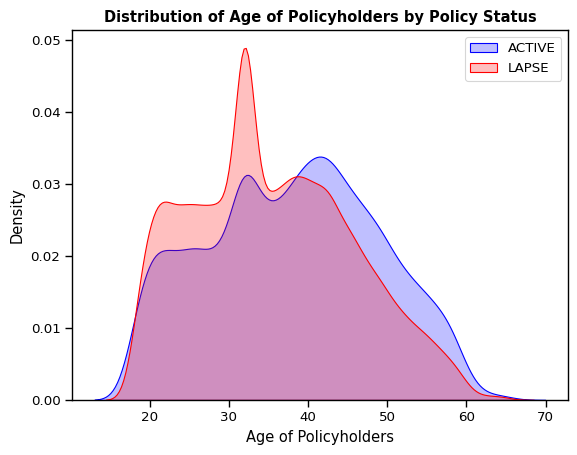

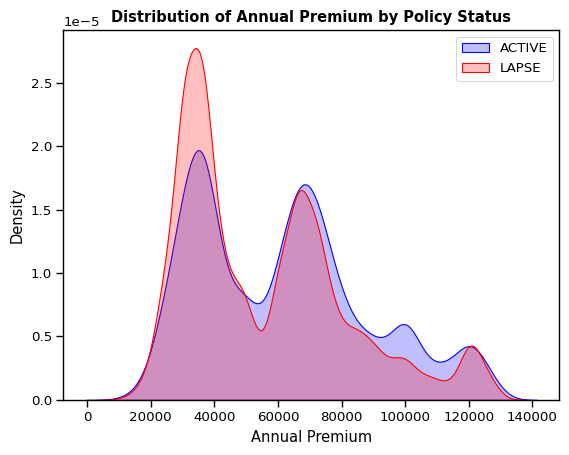

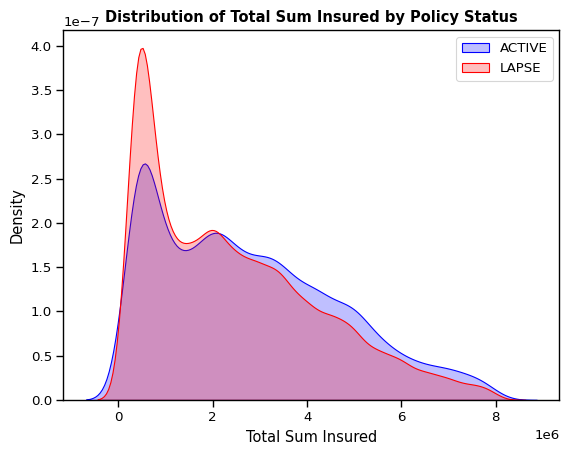

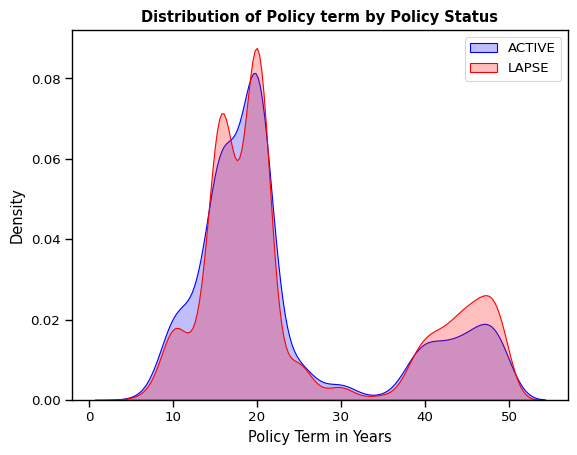

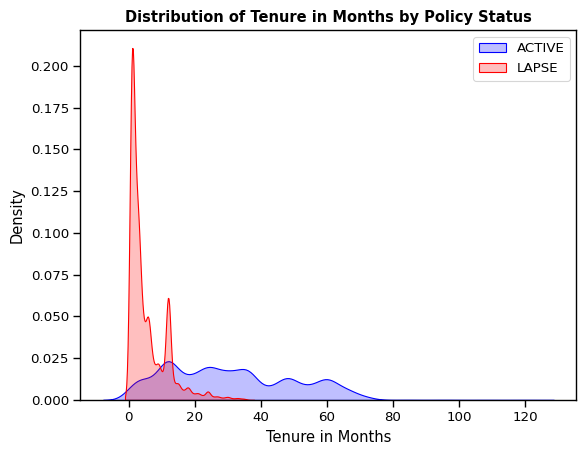

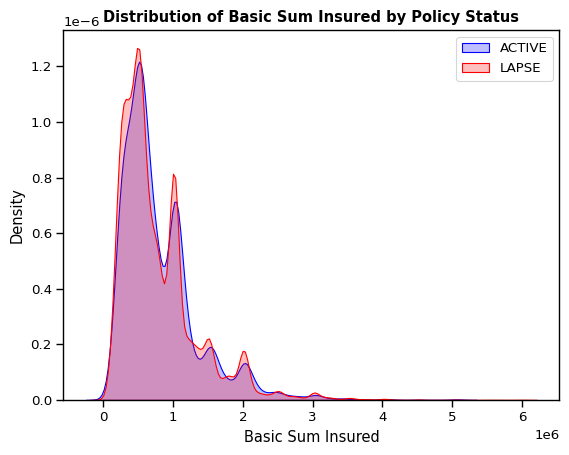

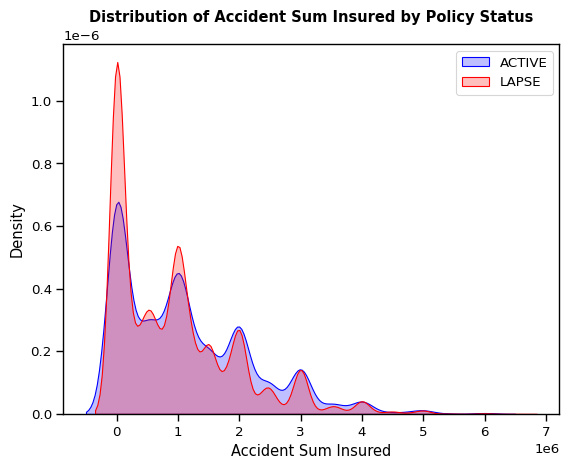

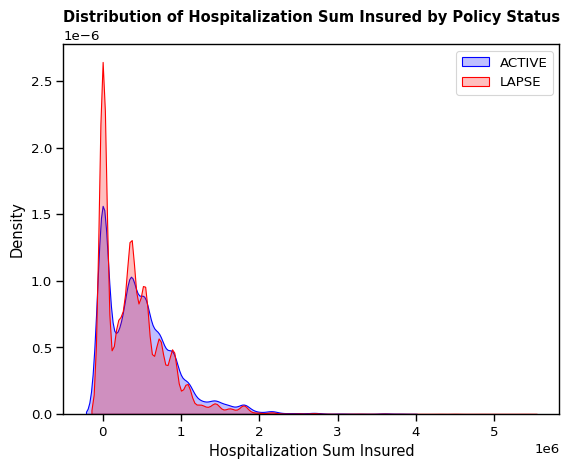

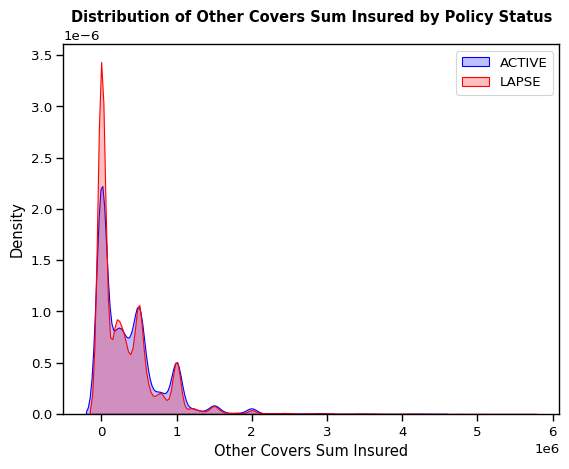

In [26]:
#Density plots to present the distribution of Active vs Lapse Policies with respect to different numerical variables

def create_density_plot(data, column, title, x_label, legend_labels, fill_colors):
    sns.set_context("paper", font_scale=1.1)
    ax = sns.kdeplot(data[column][data["POLICY_STATUS"] == legend_labels[0]], color=fill_colors[0], fill=True)
    for i in range(1, len(legend_labels)):
        ax = sns.kdeplot(data[column][data["POLICY_STATUS"] == legend_labels[i]], ax=ax, color=fill_colors[i], fill=True)
    ax.legend(legend_labels, loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel(x_label)
    ax.set_title(title, fontweight='bold')
    plt.show()


legend_labels = ['ACTIVE', 'LAPSE']
fill_colors = ['Blue', 'Red']

create_density_plot(df1, 'AGE', 'Distribution of Age of Policyholders by Policy Status', 'Age of Policyholders', legend_labels, fill_colors)
create_density_plot(df1, 'ANNUAL_PREMIUM', 'Distribution of Annual Premium by Policy Status', 'Annual Premium', legend_labels, fill_colors)
create_density_plot(df1, 'TOTAL_SUMINSURED', 'Distribution of Total Sum Insured by Policy Status', 'Total Sum Insured', legend_labels, fill_colors)
create_density_plot(df1, 'POLICYTERM_YEARS', 'Distribution of Policy term by Policy Status', 'Policy Term in Years', legend_labels, fill_colors)
create_density_plot(df1, 'TENURE_MONTHS', 'Distribution of Tenure in Months by Policy Status', 'Tenure in Months', legend_labels, fill_colors)
create_density_plot(df1, 'BASIC_SUMINSURED', 'Distribution of Basic Sum Insured by Policy Status', 'Basic Sum Insured', legend_labels, fill_colors)
create_density_plot(df1, 'ACCIDENT_SUMINSURED', 'Distribution of Accident Sum Insured by Policy Status', 'Accident Sum Insured', legend_labels, fill_colors)
create_density_plot(df1, 'HOSPITALIZATION_SUMINSURED', 'Distribution of Hospitalization Sum Insured by Policy Status', 'Hospitalization Sum Insured', legend_labels, fill_colors)
create_density_plot(df1, 'OTHER COVERS_SUMINSURED', 'Distribution of Other Covers Sum Insured by Policy Status', 'Other Covers Sum Insured', legend_labels, fill_colors)



In [27]:
# Select categorical variables (object or category dtype)
categorical_vars = df1.select_dtypes(include=['object', 'category'])

# Select numerical variables (int or float dtype)
numerical_vars = df1.select_dtypes(include=['int', 'float'])

# Example of printing the lists of variables
print("Categorical Variables:")
print(categorical_vars.columns.tolist())

print("\nNumerical Variables:")
print(numerical_vars.columns.tolist())

Categorical Variables:
['POLICYNO', 'PRODUCT_TYPE', 'PAYMENT_FREQUENCY', 'PAYMENT_METHOD', 'GENDER', 'MARITAL_STATUS', 'POLICY_STATUS']

Numerical Variables:
['POLICYTERM_YEARS', 'COMMENCED_YEAR', 'ANNUAL_PREMIUM', 'NEXTPAYMENT_YEAR', 'TENURE_MONTHS', 'NO_OF_COVERS', 'TOTAL_SUMINSURED', 'BASIC_SUMINSURED', 'ACCIDENT_SUMINSURED', 'HOSPITALIZATION_SUMINSURED', 'OTHER COVERS_SUMINSURED', 'AGE']


In [28]:
#Chi squared test & Cramer's V for Product type and Policy Status

# Create a contingency table
ct1 = pd.crosstab(df1['PRODUCT_TYPE'], df1['POLICY_STATUS'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(ct1)

# Calculate Cramer's V
n1 = ct1.sum().sum()
C1, R1 = ct1.shape[1], ct1.shape[0]  # Number of columns and rows
cramers_v = np.sqrt(chi2 / (n1 * min(C1 - 1, R1 - 1)))

# Print the results
print(ct1)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramer's V: {cramers_v}")

POLICY_STATUS  ACTIVE  LAPSE
PRODUCT_TYPE                
ENDOW            6748  32001
UL               4801  14242
Chi-Squared Test Statistic: 484.90962508290477
P-Value: 1.8257083980451702e-107
Cramer's V: 0.09160022494084914


In [29]:
#Chi squared test & Cramer's V for Payment Frequency and Policy Status

# Create a contingency table
ct2 = pd.crosstab(df1['PAYMENT_FREQUENCY'], df1['POLICY_STATUS'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(ct2)

# Calculate Cramer's V
n2 = ct2.sum().sum()
C2, R2 = ct2.shape[1], ct2.shape[0]  # Number of columns and rows
cramers_v = np.sqrt(chi2 / (n2 * min(C2 - 1, R2 - 1)))

# Print the results
print(ct2)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramer's V: {cramers_v}")

POLICY_STATUS      ACTIVE  LAPSE
PAYMENT_FREQUENCY               
A                    2425   2520
H                     651   1343
M                    7280  38069
Q                    1193   4311
Chi-Squared Test Statistic: 3258.7745265671656
P-Value: 0.0
Cramer's V: 0.23746154780547207


In [30]:
#Chi squared test & Cramer's V for Payment Method and Policy Status

# Create a contingency table
ct3 = pd.crosstab(df1['PAYMENT_METHOD'], df1['POLICY_STATUS'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(ct3)

# Calculate Cramer's V
n3 = ct3.sum().sum()
C3, R3 = ct3.shape[1], ct3.shape[0]  # Number of columns and rows
cramers_v = np.sqrt(chi2 / (n3 * min(C3 - 1, R3 - 1)))

# Print the results
print(ct3)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramer's V: {cramers_v}")

POLICY_STATUS    ACTIVE  LAPSE
PAYMENT_METHOD                
CASH               8150  40082
DIGITAL PAYMENT    1126   3264
STANDING ORDER     2273   2897
Chi-Squared Test Statistic: 2234.882269535294
P-Value: 0.0
Cramer's V: 0.1966497790903078


In [31]:
#Chi squared test & Cramer's V for Gender and Policy Status

# Create a contingency table
ct4 = pd.crosstab(df1['GENDER'], df1['POLICY_STATUS'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(ct4)

# Calculate Cramer's V
n4 = ct4.sum().sum()
C4, R4 = ct4.shape[1], ct4.shape[0]  # Number of columns and rows
cramers_v = np.sqrt(chi2 / (n4 * min(C4 - 1, R4 - 1)))

# Print the results
print(ct4)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramer's V: {cramers_v}")

POLICY_STATUS  ACTIVE  LAPSE
GENDER                      
F                5053  19260
M                6496  26983
Chi-Squared Test Statistic: 16.686060981009646
P-Value: 4.4103870312259375e-05
Cramer's V: 0.016991943333159194


In [32]:
#Chi squared test & Cramer's V for Marital Status and Policy Status

# Create a contingency table
ct5 = pd.crosstab(df1['MARITAL_STATUS'], df1['POLICY_STATUS'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(ct5)

# Calculate Cramer's V
n5 = ct5.sum().sum()
C5, R5 = ct5.shape[1], ct5.shape[0]  # Number of columns and rows
cramers_v = np.sqrt(chi2 / (n5 * min(C5 - 1, R5 - 1)))

# Print the results
print(ct5)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramer's V: {cramers_v}")

POLICY_STATUS   ACTIVE  LAPSE
MARITAL_STATUS               
M                 8699  34115
S                 2850  12128
Chi-Squared Test Statistic: 11.470984693559608
P-Value: 0.0007069121484923513
Cramer's V: 0.014088556175198982


In [33]:
def point_biserial_correlation(iv, dv):
    """Calculates the point-biserial correlation between two variables.

    Args:
      iv: Independent Variable.
      dv: Dependent Variable.

    Returns:
      The point-biserial correlation coefficient.
    """
    
    # Calculate the mean for 'LAPSE' policies
    mean_X1 = np.mean(iv[dv == 'LAPSE'])
    
    # Calculate the mean for 'ACTIVE' policies
    mean_X0 = np.mean(iv[dv == 'ACTIVE'])
    
    # Calculate the overall standard deviation
    std_X = np.std(iv)
    
    # Calculate the point-biserial correlation coefficient
    point_biserial_correlation = (mean_X1 - mean_X0) / std_X
    
    return point_biserial_correlation


# Extract the Independent and Dependent Variables

iv1 = df1['ANNUAL_PREMIUM']
iv2 = df1['POLICYTERM_YEARS']
iv3 = df1['TOTAL_SUMINSURED']
iv4 = df1['NO_OF_COVERS']
iv5 = df1['AGE']
iv6 = df1['BASIC_SUMINSURED']
iv7 = df1['ACCIDENT_SUMINSURED']
iv8 = df1['HOSPITALIZATION_SUMINSURED']
iv9 = df1['OTHER COVERS_SUMINSURED']
dv1 = df1['POLICY_STATUS']


# Calculate the point-biserial correlation coefficient.
point_biserial_corr_1 = point_biserial_correlation(iv1, dv1)
point_biserial_corr_2 = point_biserial_correlation(iv2, dv1)
point_biserial_corr_3 = point_biserial_correlation(iv3, dv1)
point_biserial_corr_4 = point_biserial_correlation(iv4, dv1)
point_biserial_corr_5 = point_biserial_correlation(iv5, dv1)
point_biserial_corr_6 = point_biserial_correlation(iv6, dv1)
point_biserial_corr_7 = point_biserial_correlation(iv7, dv1)
point_biserial_corr_8 = point_biserial_correlation(iv8, dv1)
point_biserial_corr_9 = point_biserial_correlation(iv9, dv1)


# Print the point-biserial correlation coefficient.
print(f"Point-Biserial Correlation Coefficient between Annual Premium and Policy Status: {point_biserial_corr_1}")
print(f"Point-Biserial Correlation Coefficient between Policy Term and Policy Status: {point_biserial_corr_2}")
print(f"Point-Biserial Correlation Coefficient between Total Sum Insured and Policy Status: {point_biserial_corr_3}")
print(f"Point-Biserial Correlation Coefficient between No of covers and Policy Status: {point_biserial_corr_4}")
print(f"Point-Biserial Correlation Coefficient between Age and Policy Status: {point_biserial_corr_5}")
print(f"Point-Biserial Correlation Coefficient between Basic Sum Insured and Policy Status: {point_biserial_corr_6}")
print(f"Point-Biserial Correlation Coefficient between Accident Sum Insured and Policy Status: {point_biserial_corr_7}")
print(f"Point-Biserial Correlation Coefficient between Hospitalization Sum Insured and Policy Status: {point_biserial_corr_8}")
print(f"Point-Biserial Correlation Coefficient between Other Covers Sum Insured and Policy Status: {point_biserial_corr_9}")



Point-Biserial Correlation Coefficient between Annual Premium and Policy Status: -0.22181462570767105
Point-Biserial Correlation Coefficient between Policy Term and Policy Status: 0.11145521857196151
Point-Biserial Correlation Coefficient between Total Sum Insured and Policy Status: -0.176515564337268
Point-Biserial Correlation Coefficient between No of covers and Policy Status: -0.12057937616557336
Point-Biserial Correlation Coefficient between Age and Policy Status: -0.24620035720485894
Point-Biserial Correlation Coefficient between Basic Sum Insured and Policy Status: -0.03445588191834137
Point-Biserial Correlation Coefficient between Accident Sum Insured and Policy Status: -0.18142153244104742
Point-Biserial Correlation Coefficient between Hospitalization Sum Insured and Policy Status: -0.17427799539560407
Point-Biserial Correlation Coefficient between Other Covers Sum Insured and Policy Status: -0.11351451313299461


In [34]:
#Label Encoding for columns with 2 or less unique values

df2 = df1.copy()

#Encoding Gender as Male=1 and Female=0
df2.GENDER = [1 if x == "M" else 0 for x in df2.GENDER]

#Encoding Marital Status as Married=1 and Unmarried=0
df2.MARITAL_STATUS = [1 if x == "M" else 0 for x in df2.MARITAL_STATUS]

#Encoding Product Type as ENDOW=1 and UL=0
df2.PRODUCT_TYPE = [1 if x == "ENDOW" else 0 for x in df2.PRODUCT_TYPE]

#Encoding Policy Status as Lapse=1 and Active=0
df2.POLICY_STATUS = [1 if x == "LAPSE" else 0 for x in df2.POLICY_STATUS]

In [35]:
df2.head()

,POLICYNO,PRODUCT_TYPE,POLICYTERM_YEARS,COMMENCED_YEAR,PAYMENT_FREQUENCY,ANNUAL_PREMIUM,PAYMENT_METHOD,NEXTPAYMENT_YEAR,TENURE_MONTHS,NO_OF_COVERS,TOTAL_SUMINSURED,BASIC_SUMINSURED,ACCIDENT_SUMINSURED,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,AGE,GENDER,MARITAL_STATUS,POLICY_STATUS
0,NJEV2018-453,1,49,2018,M,24732,CASH,2018,3,1,500000,500000,0,0,0,32,1,1,1
1,NJEV2018-2541,1,49,2018,M,24732,CASH,2018,1,1,500000,500000,0,0,0,32,1,1,1
2,NJEV2018-1209,1,49,2018,M,24732,CASH,2018,1,1,500000,500000,0,0,0,32,1,1,1
3,NJEV2018-1378,1,49,2018,M,24732,CASH,2020,21,1,500000,500000,0,0,0,32,0,1,1
4,NJEV2018-1853,1,49,2018,M,24732,CASH,2018,1,1,500000,500000,0,0,0,32,1,1,1


In [36]:
#Check the remaining categorical variables

catagorical = [i for i in df2.columns if df2[i].dtypes == 'object']

for i in catagorical:   
    print(i, ':', df2[i].unique())

POLICYNO : ['NJEV2018-453' 'NJEV2018-2541' 'NJEV2018-1209' ... 'NGT022018-97'
 'JCA012018-552' 'JCA012018-25']
PAYMENT_FREQUENCY : ['M' 'A' 'Q' 'H']
PAYMENT_METHOD : ['CASH' 'STANDING ORDER' 'DIGITAL PAYMENT']


In [37]:
# Define the columns required to one-hot encode

columns_to_encode = ['PAYMENT_FREQUENCY', 'PAYMENT_METHOD']

# Use Pandas' get_dummies function to perform one-hot encoding
dfe1 = pd.get_dummies(df2, columns=columns_to_encode)

columns_to_convert=['PAYMENT_FREQUENCY_A','PAYMENT_FREQUENCY_H','PAYMENT_FREQUENCY_Q','PAYMENT_FREQUENCY_M',
                    'PAYMENT_METHOD_CASH','PAYMENT_METHOD_DIGITAL PAYMENT','PAYMENT_METHOD_STANDING ORDER']

dfe1[columns_to_convert] = dfe1[columns_to_convert].astype(int)

In [38]:
dfe1 = dfe1.drop(["POLICYNO","COMMENCED_YEAR","NEXTPAYMENT_YEAR"], axis = 1)
dfe1.head()

,PRODUCT_TYPE,POLICYTERM_YEARS,ANNUAL_PREMIUM,TENURE_MONTHS,NO_OF_COVERS,TOTAL_SUMINSURED,BASIC_SUMINSURED,ACCIDENT_SUMINSURED,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,...,GENDER,MARITAL_STATUS,POLICY_STATUS,PAYMENT_FREQUENCY_A,PAYMENT_FREQUENCY_H,PAYMENT_FREQUENCY_M,PAYMENT_FREQUENCY_Q,PAYMENT_METHOD_CASH,PAYMENT_METHOD_DIGITAL PAYMENT,PAYMENT_METHOD_STANDING ORDER
0,1,49,24732,3,1,500000,500000,0,0,0,...,1,1,1,0,0,1,0,1,0,0
1,1,49,24732,1,1,500000,500000,0,0,0,...,1,1,1,0,0,1,0,1,0,0
2,1,49,24732,1,1,500000,500000,0,0,0,...,1,1,1,0,0,1,0,1,0,0
3,1,49,24732,21,1,500000,500000,0,0,0,...,0,1,1,0,0,1,0,1,0,0
4,1,49,24732,1,1,500000,500000,0,0,0,...,1,1,1,0,0,1,0,1,0,0


In [39]:
print(dfe1.info())


<class 'pandas.core.frame.DataFrame'>
Index: 57792 entries, 0 to 61052
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   PRODUCT_TYPE                    57792 non-null  int64
 1   POLICYTERM_YEARS                57792 non-null  int64
 2   ANNUAL_PREMIUM                  57792 non-null  int64
 3   TENURE_MONTHS                   57792 non-null  int64
 4   NO_OF_COVERS                    57792 non-null  int64
 5   TOTAL_SUMINSURED                57792 non-null  int64
 6   BASIC_SUMINSURED                57792 non-null  int64
 7   ACCIDENT_SUMINSURED             57792 non-null  int64
 8   HOSPITALIZATION_SUMINSURED      57792 non-null  int64
 9   OTHER COVERS_SUMINSURED         57792 non-null  int64
 10  AGE                             57792 non-null  int64
 11  GENDER                          57792 non-null  int64
 12  MARITAL_STATUS                  57792 non-null  int64
 13  POLICY

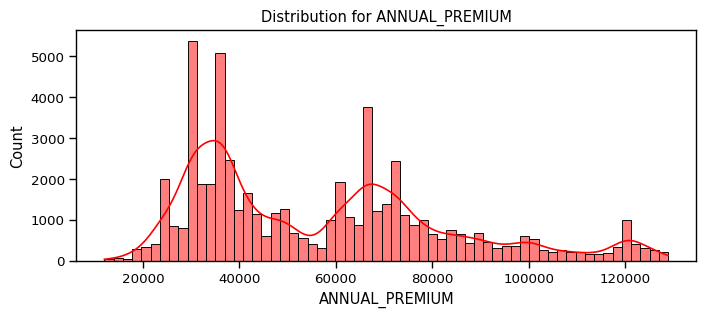

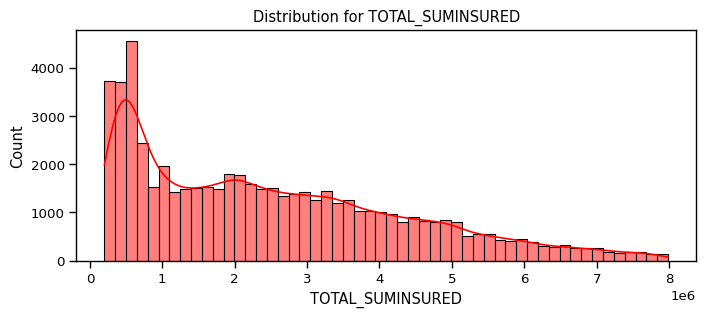

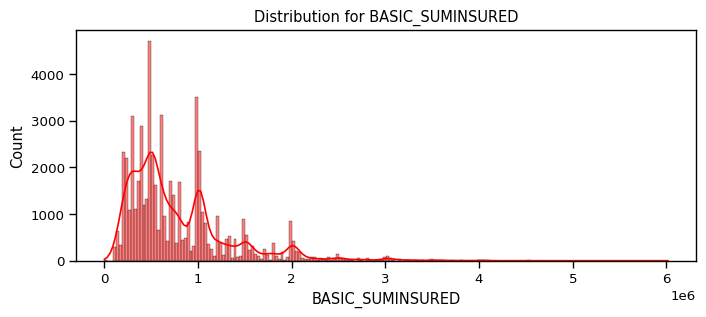

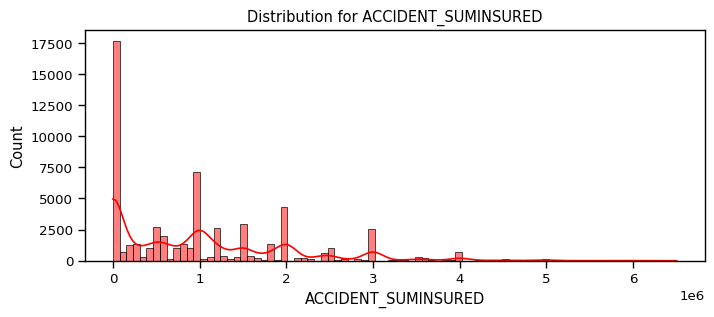

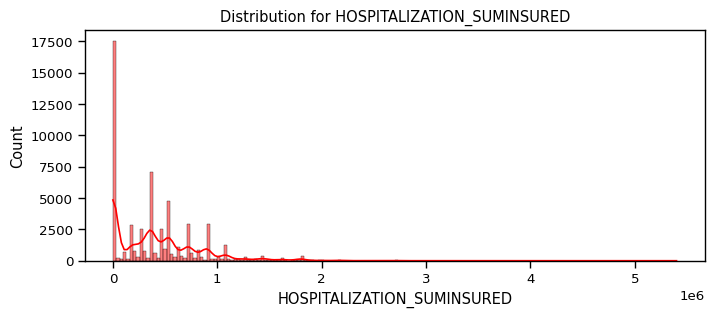

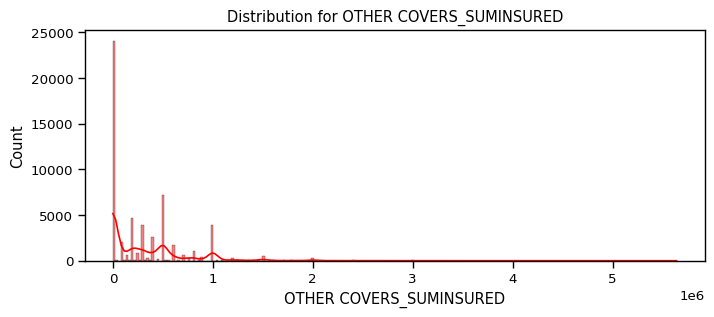

In [40]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8, 3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.histplot(frame[feature], color=color, kde=True)

col = ['ANNUAL_PREMIUM', 'TOTAL_SUMINSURED','BASIC_SUMINSURED','ACCIDENT_SUMINSURED','HOSPITALIZATION_SUMINSURED','OTHER COVERS_SUMINSURED']
for feature in col:
    distplot(feature, dfe1)

In [41]:
dfe1_std = dfe1.copy()

# Specify the columns to standardize
cols_to_standardize = ['ANNUAL_PREMIUM', 'TOTAL_SUMINSURED', 'BASIC_SUMINSURED',
                       'ACCIDENT_SUMINSURED', 'HOSPITALIZATION_SUMINSURED', 'OTHER COVERS_SUMINSURED']

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize the selected columns
dfe1_std[cols_to_standardize] = scaler.fit_transform(dfe1_std[cols_to_standardize])

In [42]:
dfe1_std.head()

,PRODUCT_TYPE,POLICYTERM_YEARS,ANNUAL_PREMIUM,TENURE_MONTHS,NO_OF_COVERS,TOTAL_SUMINSURED,BASIC_SUMINSURED,ACCIDENT_SUMINSURED,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,...,GENDER,MARITAL_STATUS,POLICY_STATUS,PAYMENT_FREQUENCY_A,PAYMENT_FREQUENCY_H,PAYMENT_FREQUENCY_M,PAYMENT_FREQUENCY_Q,PAYMENT_METHOD_CASH,PAYMENT_METHOD_DIGITAL PAYMENT,PAYMENT_METHOD_STANDING ORDER
0,1,49,-1.220531,3,1,-1.071173,-0.509588,-0.948183,-0.972179,-0.747572,...,1,1,1,0,0,1,0,1,0,0
1,1,49,-1.220531,1,1,-1.071173,-0.509588,-0.948183,-0.972179,-0.747572,...,1,1,1,0,0,1,0,1,0,0
2,1,49,-1.220531,1,1,-1.071173,-0.509588,-0.948183,-0.972179,-0.747572,...,1,1,1,0,0,1,0,1,0,0
3,1,49,-1.220531,21,1,-1.071173,-0.509588,-0.948183,-0.972179,-0.747572,...,0,1,1,0,0,1,0,1,0,0
4,1,49,-1.220531,1,1,-1.071173,-0.509588,-0.948183,-0.972179,-0.747572,...,1,1,1,0,0,1,0,1,0,0


In [43]:
# Prepare data for model training and testing input.
y = dfe1_std.POLICY_STATUS.values     # Target feature

# All features except class (target)
X = dfe1_std.drop(["POLICY_STATUS"],axis=1)

# Split the data into training and testing data
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.25, random_state=0)



In [44]:
#Balancing the Imbalance class using SMOTE oversampling method

# Initialize SMOTE with a specific sampling strategy
smote = SMOTE()

# Fit and transform the data to perform SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# Get the total number of records in the balanced dataset
total_records = len(y_resampled)
print(f"Total number of records in the balanced dataset: {total_records}")

Total number of records in the balanced dataset: 69334


In [45]:
# Count the number of occurrences for each unique class label
class_counts = np.bincount(y_resampled)

# The count of records for class label 0
count_class_0 = class_counts[0]

# The count of records for class label 1
count_class_1 = class_counts[1]

print("Number of records for class 0:", count_class_0)
print("Number of records for class 1:", count_class_1)

Number of records for class 0: 34667
Number of records for class 1: 34667


## Base Models

## Logistic Regression Model

In [46]:
# Logistic regression model on resampled data set

logistic_model = LogisticRegression(max_iter=1000, random_state=0)

# Train the model on the training data
logistic_model.fit(X_resampled, y_resampled)


LogisticRegression(max_iter=1000, random_state=0)

In [47]:
# Make predictions on the test data
y_pred_lrm = logistic_model.predict(X_test)
y_pred_lrm


array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [48]:
# Evaluate the model's performance
accuracy_lrm = accuracy_score(y_test, y_pred_lrm)
f1_lrm = f1_score(y_test, y_pred_lrm)
precision_lrm = precision_score(y_test,y_pred_lrm)
recall_lrm = recall_score(y_test, y_pred_lrm)
confusion_lrm = confusion_matrix(y_test, y_pred_lrm)
report_lrm = classification_report(y_test, y_pred_lrm)

In [49]:
# Print the evaluation metrics
print("Accuracy of Logistic Regression Model:", accuracy_lrm)
print("Precision of Logistic Regression Model:", precision_lrm)
print("Recall of Logistic Regression Model:", recall_lrm)
print("F1 Score of Logistic Regression Model:", f1_lrm)

Accuracy of Logistic Regression Model: 0.8906423034330011
Precision of Logistic Regression Model: 0.9389601264711048
Recall of Logistic Regression Model: 0.9235487214927436
F1 Score of Logistic Regression Model: 0.9311906628342478


In [50]:
# Print the confusion metrics
print("Confusion Matrix of Logistic Regression Model:\n", confusion_lrm)

Confusion Matrix of Logistic Regression Model:
 [[ 2177   695]
 [  885 10691]]


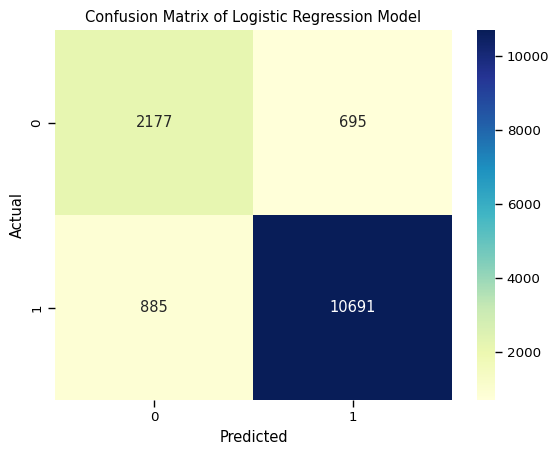

In [51]:
#Heatmap of Confusion metrics

sns.heatmap(confusion_lrm, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Logistic Regression Model")
plt.show()

In [52]:
print("Classification Report of Logistic Regression Model:\n", classification_report(y_test, y_pred_lrm))

Classification Report of Logistic Regression Model:
               precision    recall  f1-score   support

           0       0.71      0.76      0.73      2872
           1       0.94      0.92      0.93     11576

    accuracy                           0.89     14448
   macro avg       0.82      0.84      0.83     14448
weighted avg       0.89      0.89      0.89     14448



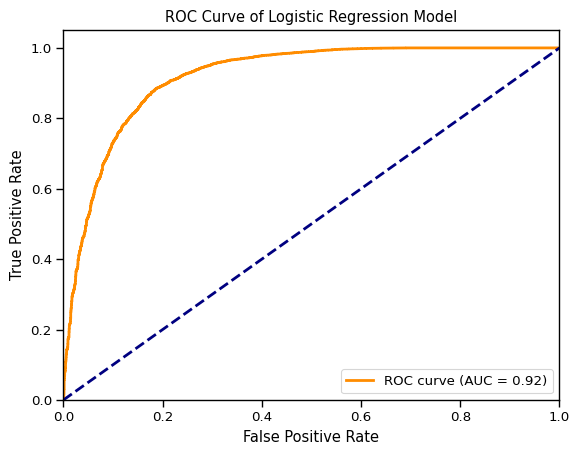

In [53]:
#ROC Curve

fpr_lrm, tpr_lrm, thresholds_lrm = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
auc_lrm = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_lrm, tpr_lrm, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_lrm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Logistic Regression Model')
plt.legend(loc="lower right")
plt.show()

In [54]:
# Get the coefficients
coefficients_lrm = logistic_model.coef_
intercept_lrm = logistic_model.intercept_

# Corresponding variable names
variable_names = X_resampled.columns  # the name of the features DataFrame
variable_names = np.append(variable_names, "Intercept")

# Create a DataFrame to display the coefficients
coefficients_df = pd.DataFrame({'Variable': variable_names, 'Coefficient': np.append(coefficients_lrm.flatten(), intercept_lrm)})

# Print the table
print(coefficients_df)

                          Variable  Coefficient
0                     PRODUCT_TYPE    -0.315101
1                 POLICYTERM_YEARS    -0.012268
2                   ANNUAL_PREMIUM    -0.248852
3                    TENURE_MONTHS    -0.182014
4                     NO_OF_COVERS     0.055052
5                 TOTAL_SUMINSURED    -0.133984
6                 BASIC_SUMINSURED     0.014801
7              ACCIDENT_SUMINSURED    -0.220799
8       HOSPITALIZATION_SUMINSURED    -0.231933
9          OTHER COVERS_SUMINSURED     0.154761
10                             AGE    -0.030648
11                          GENDER     0.856488
12                  MARITAL_STATUS     1.154155
13             PAYMENT_FREQUENCY_A     4.824016
14             PAYMENT_FREQUENCY_H     5.625444
15             PAYMENT_FREQUENCY_M     5.248441
16             PAYMENT_FREQUENCY_Q     5.940188
17             PAYMENT_METHOD_CASH     6.180122
18  PAYMENT_METHOD_DIGITAL PAYMENT     6.555025
19   PAYMENT_METHOD_STANDING ORDER     6

                           Feature  Coefficient
0   PAYMENT_METHOD_DIGITAL PAYMENT     6.555025
1              PAYMENT_METHOD_CASH     6.180122
2    PAYMENT_METHOD_STANDING ORDER     6.012601
3              PAYMENT_FREQUENCY_Q     5.940188
4              PAYMENT_FREQUENCY_H     5.625444
5              PAYMENT_FREQUENCY_M     5.248441
6              PAYMENT_FREQUENCY_A     4.824016
7                   MARITAL_STATUS     1.154155
8                           GENDER     0.856488
9                     PRODUCT_TYPE     0.315101
10                  ANNUAL_PREMIUM     0.248852
11      HOSPITALIZATION_SUMINSURED     0.231933
12             ACCIDENT_SUMINSURED     0.220799
13                   TENURE_MONTHS     0.182014
14         OTHER COVERS_SUMINSURED     0.154761
15                TOTAL_SUMINSURED     0.133984
16                    NO_OF_COVERS     0.055052
17                             AGE     0.030648
18                BASIC_SUMINSURED     0.014801
19                POLICYTERM_YEARS     0

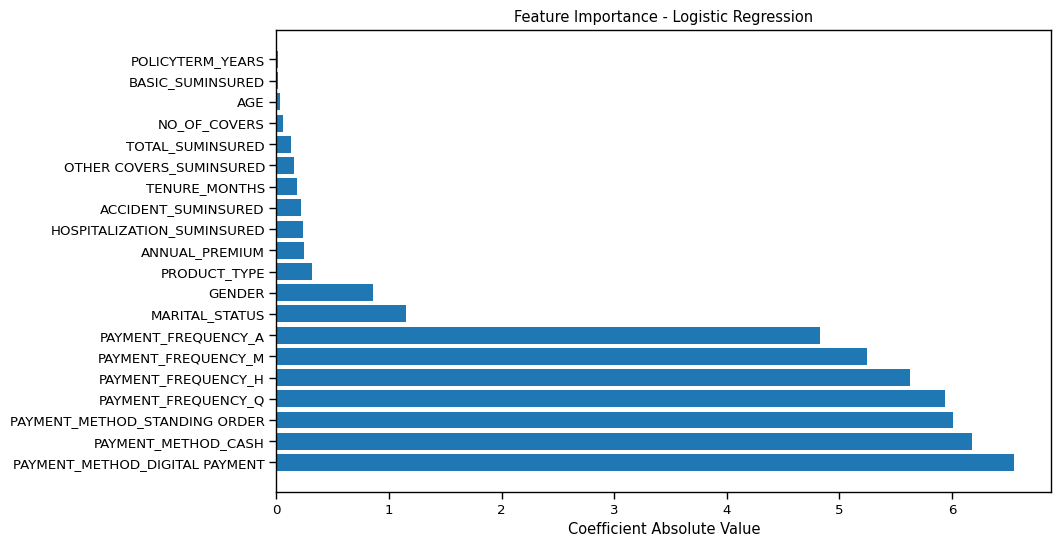

In [55]:
#Feature Importance Analysis

absolute_coefficients = np.abs(coefficients_lrm)
feature_importance = absolute_coefficients[0]
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = variable_names[sorted_indices]
sorted_coefficients = feature_importance[sorted_indices]

feature_importance_df = pd.DataFrame({'Feature': sorted_features, 'Coefficient': sorted_coefficients})
print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_coefficients)
plt.xlabel('Coefficient Absolute Value')
plt.title('Feature Importance - Logistic Regression')
plt.show()

## Decision Tree Classifier

In [56]:
# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier( criterion="entropy",max_depth=10, random_state=0)

# Train the model on the resampled training data
decision_tree_model.fit(X_resampled, y_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [57]:
# Make predictions on the test data
y_pred_dt = decision_tree_model.predict(X_test)
y_pred_dt

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [58]:
# Evaluate the model's performance

accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

In [59]:
# Print the evaluation metrics

print("Accuracy of Decision Tree Model:", accuracy_dt)
print("Precision of Decision Tree Model:", precision_dt)
print("Recall of Decision Tree Model:", recall_dt)
print("F1 Score of Decision Tree Model:", f1_dt)

Accuracy of Decision Tree Model: 0.8781146179401993
Precision of Decision Tree Model: 0.9471526195899772
Recall of Decision Tree Model: 0.8979785763648929
F1 Score of Decision Tree Model: 0.9219103365704404


In [60]:
# Print the confusion metrics
print("Confusion Matrix of Decision Tree Model:\n", confusion_dt)

Confusion Matrix of Decision Tree Model:
 [[ 2292   580]
 [ 1181 10395]]


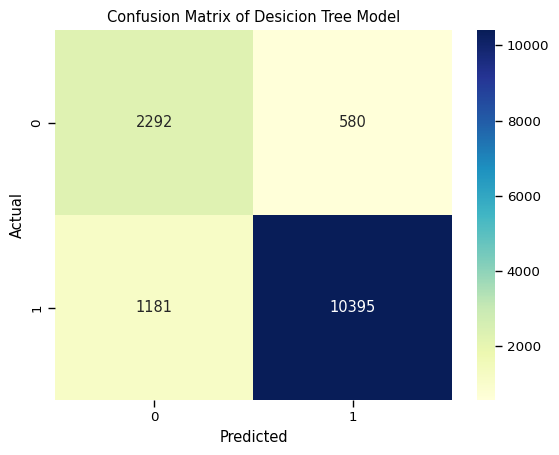

In [61]:
#Heatmap of Confusion matrix

sns.heatmap(confusion_dt, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Desicion Tree Model")
plt.show()

In [62]:
#Classification Report

print("Classification Report of Decision Tree Model:\n", report_dt)

Classification Report of Decision Tree Model:
               precision    recall  f1-score   support

           0       0.66      0.80      0.72      2872
           1       0.95      0.90      0.92     11576

    accuracy                           0.88     14448
   macro avg       0.80      0.85      0.82     14448
weighted avg       0.89      0.88      0.88     14448



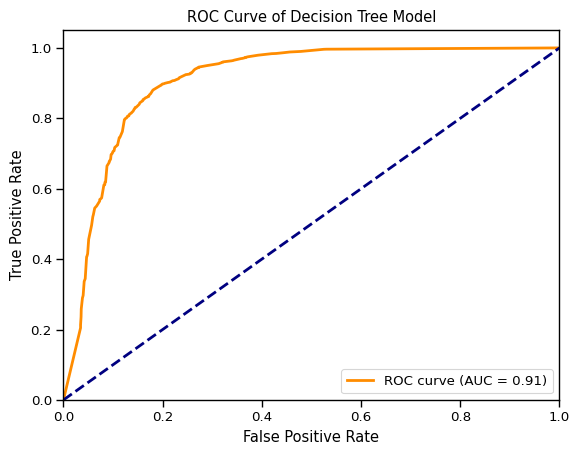

In [63]:
#ROC Curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, decision_tree_model.predict_proba(X_test)[:, 1])
auc_dt = roc_auc_score(y_test, decision_tree_model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Decision Tree Model')
plt.legend(loc="lower right")
plt.show()

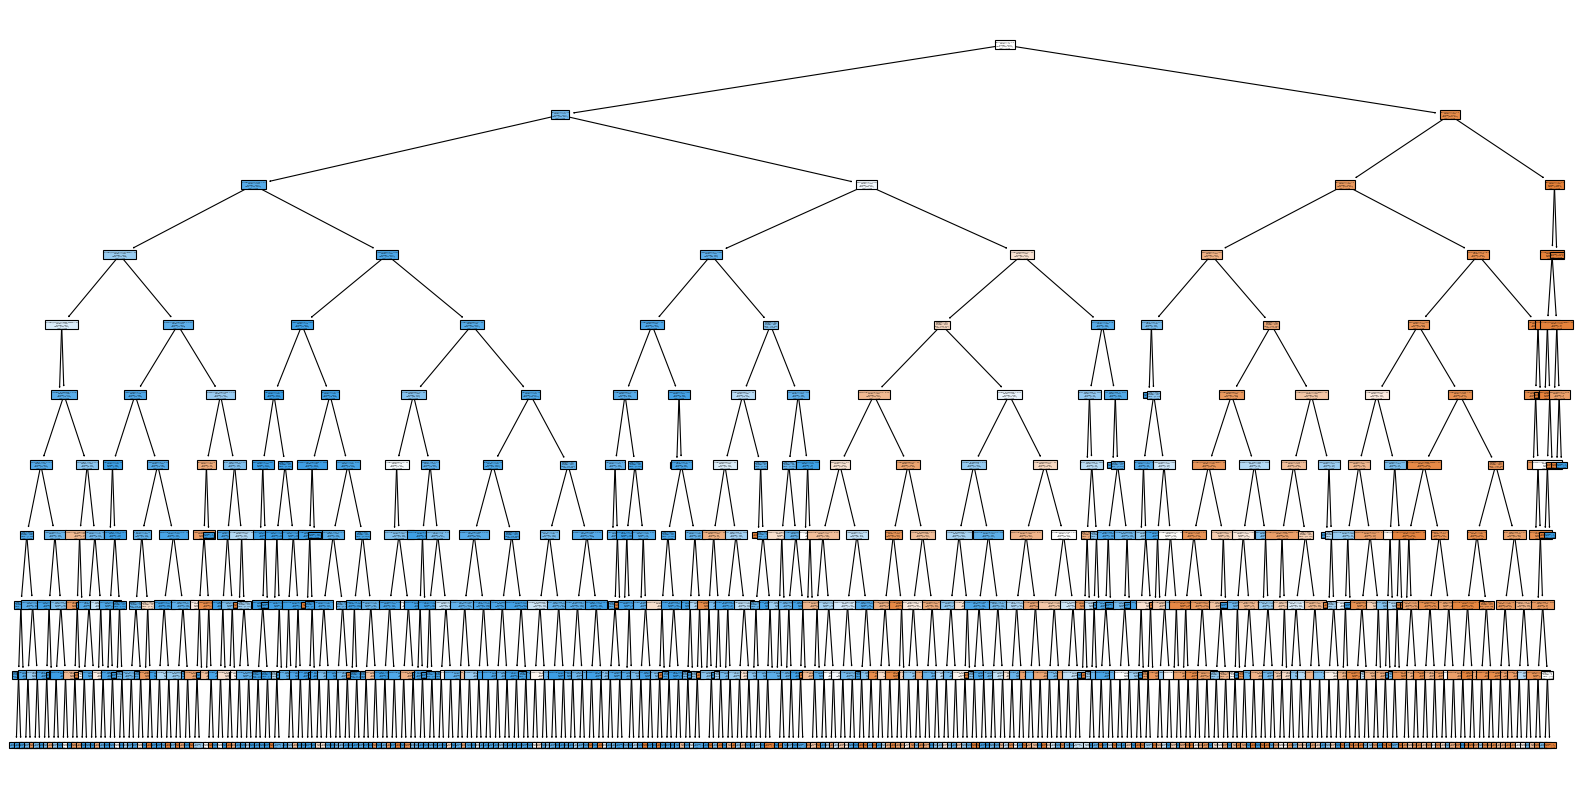

In [64]:
# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, filled=True, feature_names=X_resampled.columns, class_names=["ACTIVE", "LAPSE"])
plt.show()

## Support Vector Classification (SVC) with a linear kernel

In [65]:
# Initialize the SVC model with a linear kernel
svc_model = SVC(kernel='linear', random_state=0, probability=True)

# Train the model on the resampled training data
svc_model.fit(X_resampled, y_resampled)

SVC(kernel='linear', probability=True, random_state=0)

In [66]:
# Make predictions on the test data
y_pred_svc = svc_model.predict(X_test)
y_pred_svc

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [67]:
# Evaluate the model's performance
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)
confusion_svc = confusion_matrix(y_test, y_pred_svc)
report_svc = classification_report(y_test, y_pred_svc)

In [68]:
# Print the evaluation metrics
print("Accuracy of SVC Model:", accuracy_svc)
print("Precision of SVC Model:", precision_svc)
print("Recall of SVC Model:", recall_svc)
print("F1 Score of SVC Model:", f1_svc)

Accuracy of SVC Model: 0.8913344407530454
Precision of SVC Model: 0.9393220934316825
Recall of SVC Model: 0.9240670352453352
F1 Score of SVC Model: 0.9316321198397491


In [69]:
# Print the confusion matrix
print("Confusion Matrix of SVC Model:\n", confusion_svc)

Confusion Matrix of SVC Model:
 [[ 2181   691]
 [  879 10697]]


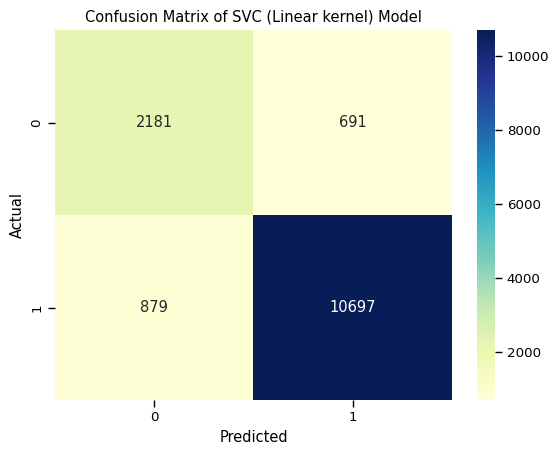

In [70]:
#Heatmap of Confusion matrix

sns.heatmap(confusion_svc, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of SVC (Linear kernel) Model")
plt.show()

In [71]:
#Classification Report
print("Classification Report of SVC Model:\n", report_svc)

Classification Report of SVC Model:
               precision    recall  f1-score   support

           0       0.71      0.76      0.74      2872
           1       0.94      0.92      0.93     11576

    accuracy                           0.89     14448
   macro avg       0.83      0.84      0.83     14448
weighted avg       0.89      0.89      0.89     14448



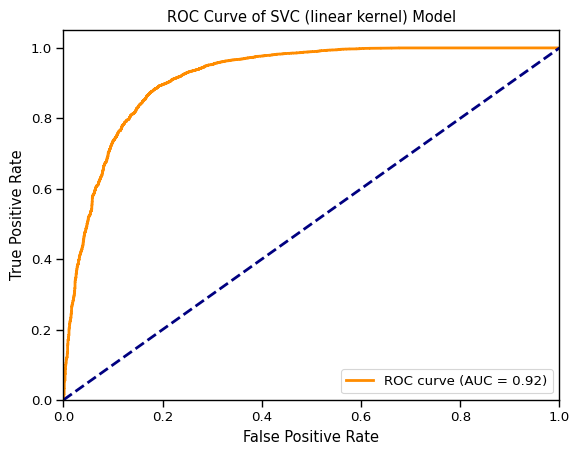

In [72]:
#ROC Curve

fpr_svc_lk, tpr_svc_lk, thresholds_svc_lk = roc_curve(y_test, svc_model.predict_proba(X_test)[:, 1])
auc_svc_lk = roc_auc_score(y_test, svc_model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_svc_lk, tpr_svc_lk, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_svc_lk:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of SVC (linear kernel) Model')
plt.legend(loc="lower right")
plt.show()

## Support Vector Machine (SVM) with Radial Basis Function (RBF)

In [73]:
# Initialize the SVM model with an RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=0, probability=True)

# Train the model on the resampled training data
svm_rbf.fit(X_resampled, y_resampled)

SVC(probability=True, random_state=0)

In [74]:
# Make predictions on the test data
y_pred_svm_rbf = svm_rbf.predict(X_test)
y_pred_svm_rbf

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [75]:
# Evaluate the model's performance
accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
f1_svm_rbf = f1_score(y_test, y_pred_svm_rbf)
precision_svm_rbf = precision_score(y_test, y_pred_svm_rbf)
recall_svm_rbf = recall_score(y_test, y_pred_svm_rbf)
confusion_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)
report_svm_rbf = classification_report(y_test, y_pred_svm_rbf)

In [76]:
# Print the evaluation metrics
print("Accuracy of SVM (RBF Kernel) Model:", accuracy_svm_rbf)
print("Precision of SVM (RBF Kernel) Model:", precision_svm_rbf)
print("Recall of SVM (RBF Kernel) Model:", recall_svm_rbf)
print("F1 Score of SVM (RBF Kernel) Model:", f1_svm_rbf)

Accuracy of SVM (RBF Kernel) Model: 0.8837209302325582
Precision of SVM (RBF Kernel) Model: 0.9461677186654643
Recall of SVM (RBF Kernel) Model: 0.9064443676572218
F1 Score of SVM (RBF Kernel) Model: 0.9258801729462631


In [77]:
# Print the confusion matrix
print("Confusion Matrix of SVM (RBF Kernel) Model:\n", confusion_svm_rbf)

Confusion Matrix of SVM (RBF Kernel) Model:
 [[ 2275   597]
 [ 1083 10493]]


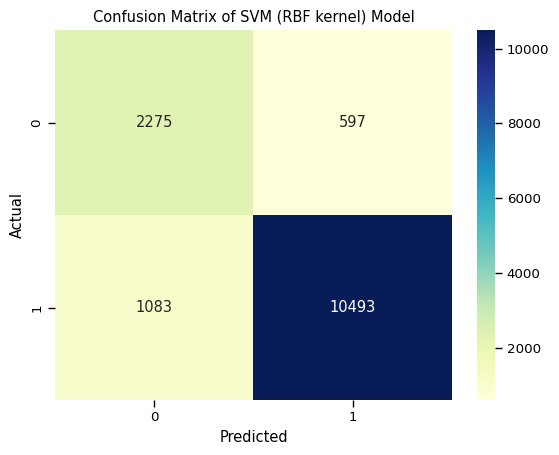

In [78]:
#Heatmap of Confusion matrix

sns.heatmap(confusion_svm_rbf, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of SVM (RBF kernel) Model")
plt.show()

In [79]:
# Print the classification report
print("Classification Report of SVM (RBF Kernel) Model:\n", report_svm_rbf)

Classification Report of SVM (RBF Kernel) Model:
               precision    recall  f1-score   support

           0       0.68      0.79      0.73      2872
           1       0.95      0.91      0.93     11576

    accuracy                           0.88     14448
   macro avg       0.81      0.85      0.83     14448
weighted avg       0.89      0.88      0.89     14448



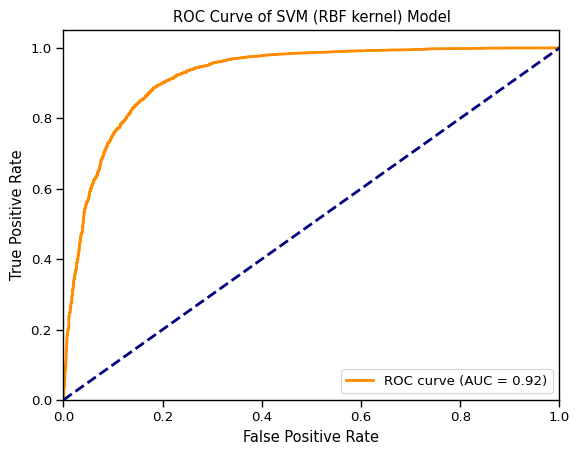

In [80]:
#ROC Curve

fpr_svm_rbf, tpr_svm_rbf, thresholds_svm_rbf = roc_curve(y_test, svm_rbf.predict_proba(X_test)[:, 1])
auc_svm_rbf = roc_auc_score(y_test, svm_rbf.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_svm_rbf, tpr_svm_rbf, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_svm_rbf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of SVM (RBF kernel) Model')
plt.legend(loc="lower right")
plt.show()

## Ensemble Models

## Random Forest Model

In [81]:
# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=0)

# Train the model on the resampled training data
random_forest_model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=0)

In [82]:
# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test)
y_pred_rf

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [83]:
# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

In [84]:
# Print the evaluation metrics
print("Accuracy of Random Forest Model:", accuracy_rf)
print("Precision of Random Forest Model:", precision_rf)
print("Recall of Random Forest Model:", recall_rf)
print("F1 Score of Random Forest Model:", f1_rf)

Accuracy of Random Forest Model: 0.9092607973421927
Precision of Random Forest Model: 0.9434891557936577
Recall of Random Forest Model: 0.9432446440912232
F1 Score of Random Forest Model: 0.9433668840986651


In [85]:
# Print the confusion metrics
print("Confusion Matrix of Random Forest Model:\n", confusion_rf)

Confusion Matrix of Random Forest Model:
 [[ 2218   654]
 [  657 10919]]


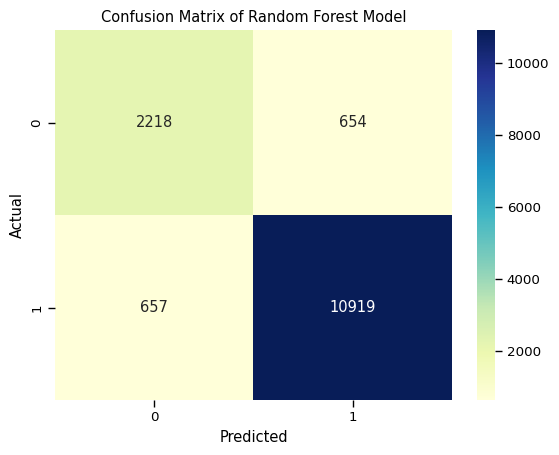

In [86]:
#Heatmap of Confusion matrix

sns.heatmap(confusion_rf, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Random Forest Model")
plt.show()

In [87]:
#Classification report
print("Classification Report of Random Forest Model:\n", report_rf)

Classification Report of Random Forest Model:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      2872
           1       0.94      0.94      0.94     11576

    accuracy                           0.91     14448
   macro avg       0.86      0.86      0.86     14448
weighted avg       0.91      0.91      0.91     14448



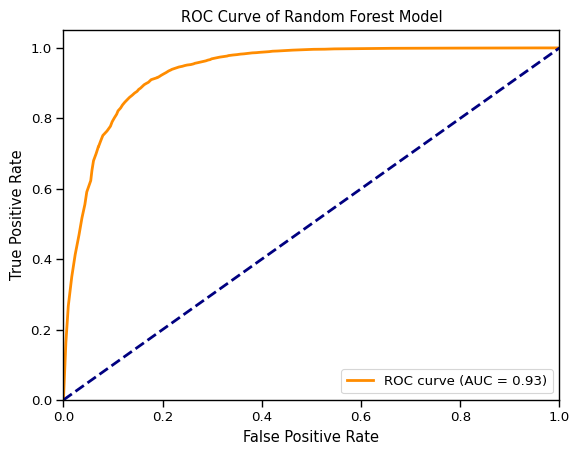

In [88]:
#ROC Curve

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, random_forest_model.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Random Forest Model')
plt.legend(loc="lower right")
plt.show()

## XGBoost Model

In [89]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=0)

# Train the model on the resampled training data
xgb_model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [90]:
# Make predictions on test data
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb

array([0, 1, 0, ..., 1, 1, 1])

In [91]:
# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

In [92]:
# Print the evaluation metrics
print("Accuracy of XGBoost Model:", accuracy_xgb)
print("Precision of XGBoost  Model:", precision_xgb)
print("Recall of XGBoost  Model:", recall_xgb)
print("F1 Score of XGBoost  Model:", f1_xgb)

Accuracy of XGBoost Model: 0.9137596899224806
Precision of XGBoost  Model: 0.9427395851191497
Recall of XGBoost  Model: 0.9500691085003455
F1 Score of XGBoost  Model: 0.9463901557525171


In [93]:
# Print the confusion matrix
print("Confusion Matrix of XGBosst Model:\n", confusion_xgb)

Confusion Matrix of XGBosst Model:
 [[ 2204   668]
 [  578 10998]]


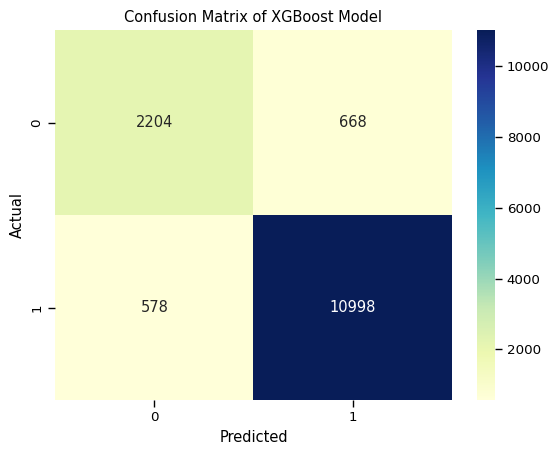

In [94]:
#Heatmap of Confusion matrix

sns.heatmap(confusion_xgb, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of XGBoost Model")
plt.show()

In [95]:
#Classification report
print("Classification Report of XGBoost Model:\n", report_xgb)

Classification Report of XGBoost Model:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78      2872
           1       0.94      0.95      0.95     11576

    accuracy                           0.91     14448
   macro avg       0.87      0.86      0.86     14448
weighted avg       0.91      0.91      0.91     14448



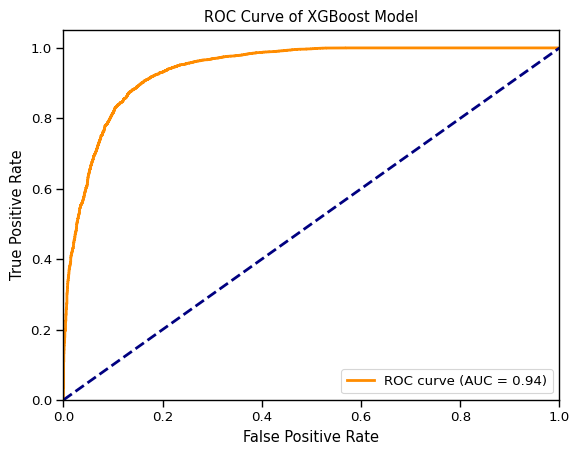

In [96]:
#ROC Curve

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of XGBoost Model')
plt.legend(loc="lower right")
plt.show()

## Ensemble Model using Voting Classifier

In [99]:
# Define the individual models
logistic_model_2 = LogisticRegression(max_iter=1000, random_state=0)
xgb_model_2 = XGBClassifier()

# Create the Voting Classifier
vc_model = VotingClassifier(estimators=[('lr', logistic_model_2), ('xgb', xgb_model_2)], voting='soft')

# Train the Voting Classifier on the resampled training data
vc_model.fit(X_resampled, y_resampled)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=0)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [100]:
# Make predictions on the test data
y_pred_vc = vc_model.predict(X_test)
y_pred_vc

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [101]:
# Evaluate the model's performance
accuracy_vc = accuracy_score(y_test, y_pred_vc)
f1_vc = f1_score(y_test, y_pred_vc)
precision_vc = precision_score(y_test, y_pred_vc)
recall_vc = recall_score(y_test, y_pred_vc)
confusion_vc = confusion_matrix(y_test, y_pred_vc)
report_vc = classification_report(y_test, y_pred_vc)

In [102]:
# Print the evaluation metrics
print("Accuracy of Voting Classifier Model:", accuracy_vc)
print("Precision of Voting Classifier Model:", precision_vc)
print("Recall of Voting Classifier Model:", recall_vc)
print("F1 Score of Voting Classifier Model:", f1_vc)

Accuracy of Voting Classifier Model: 0.9119601328903655
Precision of Voting Classifier Model: 0.9425356467960831
Recall of Voting Classifier Model: 0.9479094678645473
F1 Score of Voting Classifier Model: 0.9452149194590405


In [103]:
# Print the confusion matrix
print("Confusion Matrix of Voting Classifier Model:\n", confusion_vc)

Confusion Matrix of Voting Classifier Model:
 [[ 2203   669]
 [  603 10973]]


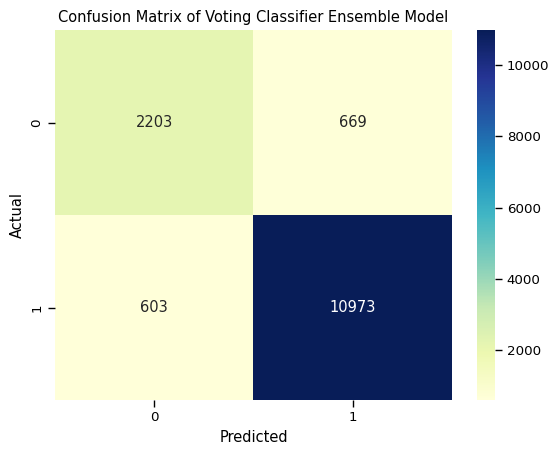

In [104]:
#Heatmap of Confusion matrix

sns.heatmap(confusion_vc, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Voting Classifier Ensemble Model")
plt.show()

In [105]:
# Print the classification report
print("Classification Report of Voting Classifier Model:\n", report_vc)

Classification Report of Voting Classifier Model:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78      2872
           1       0.94      0.95      0.95     11576

    accuracy                           0.91     14448
   macro avg       0.86      0.86      0.86     14448
weighted avg       0.91      0.91      0.91     14448



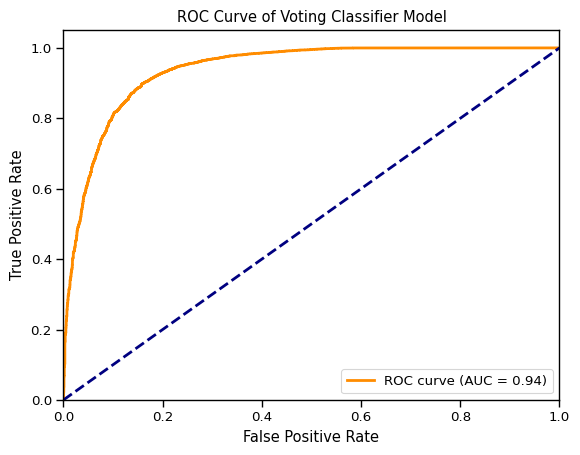

In [106]:
#ROC Curve

fpr_vc, tpr_vc, thresholds_vc = roc_curve(y_test, vc_model.predict_proba(X_test)[:, 1])
auc_vc = roc_auc_score(y_test, vc_model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_vc, tpr_vc, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_vc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Voting Classifier Model')
plt.legend(loc="lower right")
plt.show()

## Cross Validation and Comparison on Different Models

In [107]:
models = []

models.append(('Logistic Regression', LogisticRegression(max_iter=1000, random_state = 0)))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=10)))
models.append(('Random Forest', RandomForestClassifier(random_state = 0)))
models.append(("XGBoost", XGBClassifier()))
models.append(("Voting Classifier",  VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)), ('xgb',  XGBClassifier())], voting='soft')))


In [129]:
# Lists to store results
acc_results = []
auc_results = []
precision_results = []
recall_results = []
f1_results = []
names = []

result_col = ["Algorithm", "ROC AUC Mean", "ROC AUC STD", "Accuracy Mean", "Accuracy STD", "Precision Mean", "Recall Mean", "F1 Mean"]
model_results = pd.DataFrame(columns=result_col)

i = 0
# K-fold cross-validation
for name, model in models:
    names.append(name)
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)
    
    cv_acc_results = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring="accuracy")
    cv_auc_results = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring="roc_auc")
    
    # Additional metrics
    y_pred = cross_val_predict(model, X_resampled, y_resampled, cv=kfold)
    classification_rep = classification_report(y_resampled, y_pred, output_dict=True)
    
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    
    # Store precision, recall, and F1-score in lists
    precision_results.append(classification_rep["weighted avg"]["precision"] * 100)
    recall_results.append(classification_rep["weighted avg"]["recall"] * 100)
    f1_results.append(classification_rep["weighted avg"]["f1-score"] * 100)
    
    # Add all metrics to the DataFrame
    model_results.loc[i] = [name, 
                            round(cv_auc_results.mean() * 100, 2),
                            round(cv_auc_results.std() * 100, 2),
                            round(cv_acc_results.mean() * 100, 2),
                            round(cv_acc_results.std() * 100, 2),
                            round(precision_results[i], 2),
                            round(recall_results[i], 2),
                            round(f1_results[i], 2)]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD,Precision Mean,Recall Mean,F1 Mean
4,Random Forest,98.49,0.05,94.10,0.20,94.11,94.10,94.10
5,XGBoost,98.38,0.03,94.00,0.16,94.04,94.00,94.00
6,Voting Classifier,97.87,0.05,93.00,0.17,93.09,93.00,93.00
3,Decision Tree Classifier,95.64,0.07,89.88,0.11,89.89,89.88,89.88
0,Logistic Regression,95.32,0.10,89.37,0.28,89.57,89.37,89.36
1,SVC,95.25,0.09,89.49,0.23,89.68,89.49,89.47
2,Kernel SVM,93.93,0.11,86.72,0.24,86.97,86.72,86.69


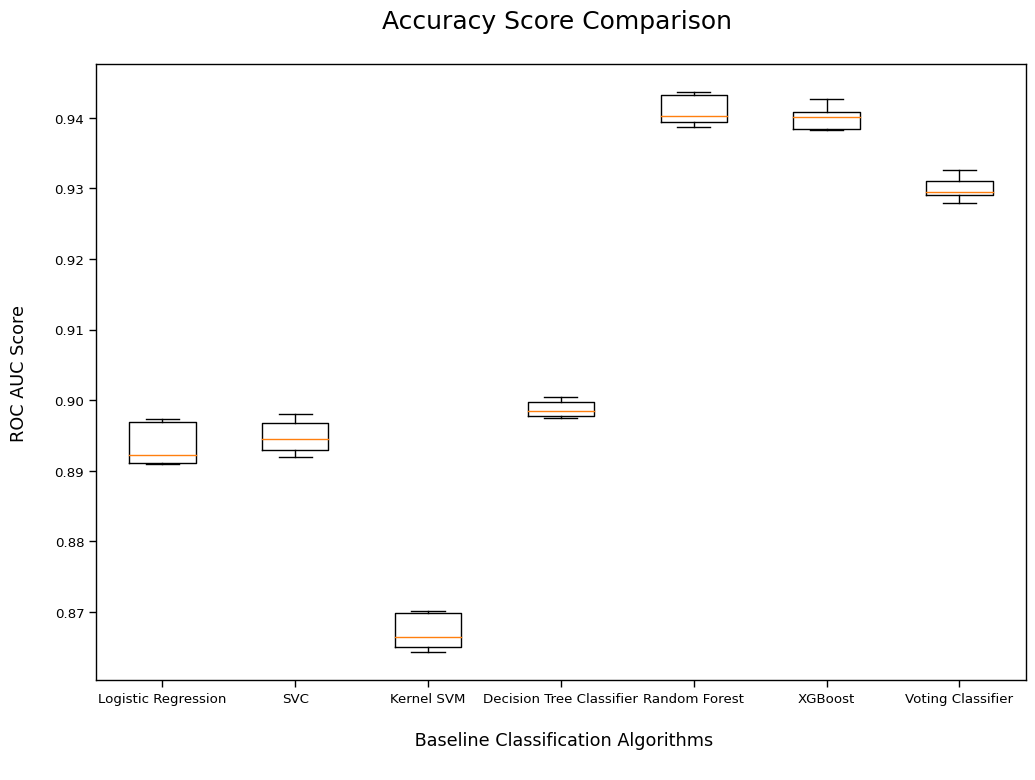

In [130]:
#Accuracy Score Comparison

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.title('Accuracy Score Comparison \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "18", fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

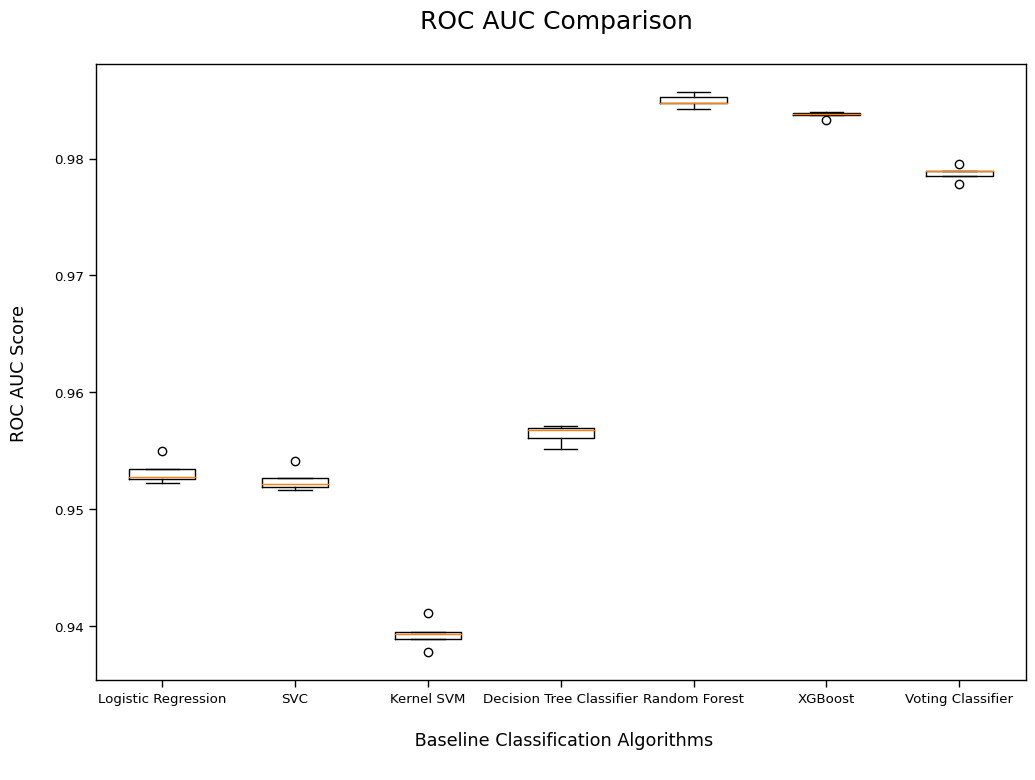

In [131]:
#ROC AUC Comparison

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.title('ROC AUC Comparison \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "18", fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()